In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
#all the good old hyperparameters.
np.random.seed(1234)
tf.set_random_seed(1234)
samples = 300
noise = 0.67
NUM_BATCHES= 4000
lr = .01
latentDim = 613
latentDim2= 613
# latentDim4= 10
lamb = 0.03
batch_size = 10
#h is resolution for descion plot
h = 0.1
circles = 150

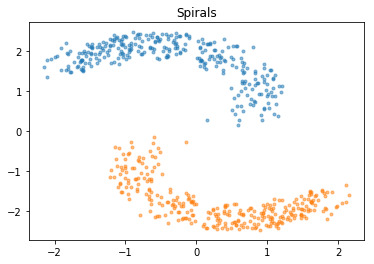

In [3]:
#derived this method for creating data from:https://goo.gl/s46c9a

n = np.sqrt(np.random.rand(samples,1)) * circles * (2*np.pi)/360
#sampling numbers from 0 to 780 (a little more than 2* 360) then convert it to raidans
#trig functions go from -1,1, by scaling it by n we are making them go from ~0 to 15 
#add some noise to make it tasty.
x1 = np.cos(n)*n + np.random.rand(samples,1) * noise
#x1 = np.log(n)
#x2 =  n*np.log(n)
x2 = np.sin(n)*n + np.random.rand(samples,1) * noise
Spiral1 = np.hstack((x1,x2))
Spiral2 = np.hstack((-x1,-x2))
Y = np.hstack((np.zeros(samples),np.ones(samples)))
plt.title("Spirals")
plt.plot(Spiral1[0:-1,0], Spiral1[0:-1,1], ".", label="Spiral 1", alpha=0.5)
plt.plot(Spiral2[0:-1,0], Spiral2[0:-1,1], ".", label="Spiral 2", alpha=0.5)
Spirals = np.vstack((Spiral1,Spiral2))



In [4]:
w1 = tf.get_variable('w1', [2, latentDim], tf.float32, tf.random_normal_initializer())
w2 = tf.get_variable('w2', [latentDim, latentDim2], tf.float32, tf.random_normal_initializer())
w3 = tf.get_variable('w3', [latentDim2, 1], tf.float32, tf.random_normal_initializer())
# w4 = tf.get_variable('w4', [latentDim3, latentDim4], tf.float32, tf.random_normal_initializer())
# w5 = tf.get_variable('w5', [latentDim4, 1], tf.float32, tf.random_normal_initializer())
b1 = tf.get_variable('b1', [1,latentDim], tf.float32, tf.zeros_initializer())
b2 = tf.get_variable('b2', [1, latentDim2], tf.float32, tf.zeros_initializer())   
b3 = tf.get_variable('b3', [1,1], tf.float32, tf.zeros_initializer())
# b4 = tf.get_variable('b4', [1,latentDim4], tf.float32, tf.zeros_initializer())
# b5 = tf.get_variable('b5', [1,1], tf.float32, tf.zeros_initializer())

In [5]:
#The f(x) we get is not going to produce a probability, we are going to leave that to the TF cross entropy loss boy.
def f(x): 
    return tf.matmul(tf.nn.tanh(tf.matmul(tf.nn.tanh(tf.matmul(x,w1)+ b1), w2) + b2),w3) + b3    
#     return tf.matmul(tf.nn.tanh(tf.matmul(tf.nn.tanh(tf.matmul(tf.nn.tanh(tf.matmul(tf.nn.tanh(tf.matmul(x,w1)+ b1), w2) + b2),w3) + b3), w4) + b4), w5) + b5

In [6]:
x = tf.placeholder(tf.float32, [batch_size,2])
y = tf.placeholder(tf.float32, [batch_size,1])

y_hat = f(x)
loss = tf.losses.sigmoid_cross_entropy(y,y_hat,label_smoothing=5) + lamb*(tf.pow(tf.norm(w1),2) + tf.pow(tf.norm(w2),2))

#loss = tf.losses.sigmoid_cross_entropy(y,y_hat) 
#loss = tf.losses.sigmoid_cross_entropy(y,y_hat) + lamb*(tf.pow(tf.norm(w1),2) + tf.pow(tf.norm(w2),2) + tf.pow(tf.norm(w3),2) + tf.pow(tf.norm(w4),2) + tf.pow(tf.norm(w5),2))
optim = tf.train.AdagradOptimizer(lr).minimize(loss)
init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)

In [7]:
for _ in tqdm(range(0, NUM_BATCHES)):
    choices = np.random.choice(samples,batch_size)
    x_np = Spirals[choices]
    y_np = np.array(Y[choices]).reshape((batch_size,1))
    loss_np, _ = sess.run([loss, optim], feed_dict={x: x_np, y: y_np})
#     print(loss_np)


  0%|                                                                                         | 0/4000 [00:00<?, ?it/s]

11324.0625


  0%|                                                                                 | 1/4000 [00:00<08:34,  7.77it/s]

11214.339
11146.093
11092.135
11042.206
10978.075
10925.431
10898.243
10870.648


  0%|▏                                                                                | 9/4000 [00:00<01:46, 37.44it/s]

10806.431
10772.052
10735.96
10697.601
10651.549
10615.009
10598.287
10554.293


  0%|▎                                                                               | 17/4000 [00:00<01:20, 49.41it/s]

10570.619
10483.784
10461.957
10424.886
10400.106
10380.762
10353.126


  1%|▍                                                                               | 24/4000 [00:00<01:14, 53.60it/s]

10323.442
10303.112
10268.854
10226.892
10228.29
10202.976
10158.672
10190.619


  1%|▋                                                                               | 32/4000 [00:00<01:08, 58.23it/s]

10122.578
10092.4375
10066.896
10080.22
10024.682
10018.025
9995.675
9945.864
9931.442


  1%|▊                                                                               | 41/4000 [00:00<01:03, 62.10it/s]

9917.221
9890.562
9867.608
9841.054
9815.307
9812.267
9778.575


  1%|▉                                                                               | 48/4000 [00:00<01:02, 63.00it/s]

9800.035
9755.795
9757.383
9708.383
9703.402
9663.562
9672.368
9628.307
9603.121


  1%|█▏                                                                              | 57/4000 [00:00<01:00, 65.24it/s]

9600.506
9576.544
9556.303
9530.259
9539.269
9531.924
9490.118
9485.924


  2%|█▎                                                                              | 65/4000 [00:01<01:01, 63.96it/s]

9439.781
9417.859
9415.323
9398.6045
9382.033
9363.424
9352.814


  2%|█▍                                                                              | 72/4000 [00:01<01:01, 64.00it/s]

9354.636
9340.386
9291.538
9268.337
9262.531
9233.12
9213.613
9221.396


  2%|█▌                                                                              | 80/4000 [00:01<01:00, 64.48it/s]

9190.359
9195.385
9149.525
9134.435
9130.5
9149.184
9112.481
9076.7
9091.43


  2%|█▊                                                                              | 89/4000 [00:01<00:59, 65.81it/s]

9086.742
9050.003
9038.725
8995.832
9047.384
8995.528
8993.482
8952.081


  2%|█▉                                                                              | 97/4000 [00:01<00:59, 65.80it/s]

8954.285
8941.519
8912.579
8903.264
8911.156
8868.547
8860.557


  3%|██                                                                             | 104/4000 [00:01<01:00, 64.77it/s]

8853.178
8838.187
8840.315
8790.92
8801.662
8769.734
8764.0625


  3%|██▏                                                                            | 111/4000 [00:01<01:00, 64.63it/s]

8758.017
8730.845
8744.201
8715.62
8692.901
8681.618
8685.446
8675.094


  3%|██▎                                                                            | 119/4000 [00:01<00:59, 65.45it/s]

8632.21
8638.643
8629.254
8606.911
8586.988
8589.654
8588.107
8571.108


  3%|██▌                                                                            | 127/4000 [00:01<00:58, 66.05it/s]

8584.016
8534.569
8517.279
8507.68
8503.428
8511.734
8465.178
8465.783


  3%|██▋                                                                            | 135/4000 [00:02<00:58, 66.35it/s]

8471.07
8500.271
8423.559
8454.309
8416.648
8426.545
8375.039
8401.006
8349.292


  4%|██▊                                                                            | 144/4000 [00:02<00:57, 67.12it/s]

8348.786
8329.861
8329.959
8339.672
8323.819
8290.769
8281.475
8277.356


  4%|███                                                                            | 152/4000 [00:02<00:57, 66.84it/s]

8264.529
8283.853
8247.8
8235.26
8212.512
8195.4795
8180.755
8179.6597


  4%|███▏                                                                           | 160/4000 [00:02<00:57, 67.21it/s]

8167.758
8164.2334
8172.001
8140.663
8122.1655
8114.9907
8116.0894
8103.4673


  4%|███▎                                                                           | 168/4000 [00:02<00:56, 67.65it/s]

8085.2876
8075.791
8062.5576
8065.566
8057.6567
8039.4194
8023.371
8007.5205


  4%|███▍                                                                           | 176/4000 [00:02<00:56, 67.90it/s]

8019.6187
7999.519
7983.625
7986.8237
7966.6885
7974.141
7945.4546
7936.754


  5%|███▋                                                                           | 184/4000 [00:02<00:56, 67.65it/s]

7922.3013
7910.773
7905.745
7892.035
7869.6333
7912.836
7870.8823
7846.235


  5%|███▊                                                                           | 192/4000 [00:02<00:56, 67.41it/s]

7849.447
7833.4434
7823.202
7813.7183
7817.172
7803.951
7801.198
7817.5215


  5%|███▉                                                                           | 200/4000 [00:02<00:56, 67.57it/s]

7784.584
7781.8696
7762.3306
7748.811
7733.3374
7730.9224
7745.8496


  5%|████                                                                           | 207/4000 [00:03<00:56, 67.32it/s]

7712.8896
7701.444
7720.01
7689.0356
7710.866
7667.3433
7656.3394
7665.692


  5%|████▏                                                                          | 215/4000 [00:03<00:56, 67.43it/s]

7661.4297
7628.337
7621.1743
7605.0234
7610.1875
7591.7373
7634.315
7584.37


  6%|████▍                                                                          | 223/4000 [00:03<00:55, 67.59it/s]

7570.435
7554.6006
7553.6777
7537.111
7533.9077
7529.998
7549.415


  6%|████▌                                                                          | 230/4000 [00:03<00:55, 67.47it/s]

7512.8286
7493.556
7500.717
7488.4995
7471.5796
7467.9272
7468.0747
7443.814


  6%|████▋                                                                          | 238/4000 [00:03<00:55, 67.60it/s]

7445.0312
7426.798
7427.38
7434.454
7404.3228
7395.738
7383.756


  6%|████▊                                                                          | 245/4000 [00:03<00:55, 67.47it/s]

7399.4844
7402.837
7384.7915
7355.2915
7347.9004
7341.677
7329.1973
7344.425


  6%|████▉                                                                          | 253/4000 [00:03<00:55, 67.65it/s]

7321.4365
7309.375
7303.105
7316.282
7290.742
7272.4478
7275.8745


  6%|█████▏                                                                         | 260/4000 [00:03<00:55, 67.52it/s]

7267.735
7259.9834
7241.323
7258.994
7238.7446
7242.752
7239.914


  7%|█████▎                                                                         | 267/4000 [00:03<00:55, 67.54it/s]

7205.379
7204.895
7190.05
7186.6963
7193.8745
7192.616
7168.0938


  7%|█████▍                                                                         | 274/4000 [00:04<00:55, 67.58it/s]

7161.268
7180.4966
7146.2783
7131.9824
7133.3438
7133.2773
7110.1494
7134.411


  7%|█████▌                                                                         | 282/4000 [00:04<00:54, 67.69it/s]

7091.7183
7097.416
7085.801
7103.365
7066.8247
7057.4966
7051.4243
7039.0957


  7%|█████▋                                                                         | 290/4000 [00:04<00:54, 67.92it/s]

7037.852
7057.2925
7025.681
7019.1475
7008.9595
7009.2075
7006.1924
6992.544


  7%|█████▉                                                                         | 298/4000 [00:04<00:54, 68.17it/s]

6982.983
6975.898
6964.3555
6957.5103
6952.973
6942.216
6943.5137
6936.8564


  8%|██████                                                                         | 306/4000 [00:04<00:54, 68.26it/s]

6935.1367
6918.411
6906.747
6904.045
6905.0156
6899.542
6884.2207
6878.231
6865.218


  8%|██████▏                                                                        | 315/4000 [00:04<00:53, 68.56it/s]

6896.347
6855.681
6852.0493
6837.7085
6835.907
6826.9004
6838.474
6816.4546


  8%|██████▍                                                                        | 323/4000 [00:04<00:53, 68.75it/s]

6812.508
6805.913
6795.0845
6782.096
6804.1416
6799.1064
6767.455
6764.4766


  8%|██████▌                                                                        | 331/4000 [00:04<00:53, 68.88it/s]

6753.494
6749.912
6743.916
6729.8066
6726.452
6718.169
6740.7305
6699.8696


  8%|██████▋                                                                        | 339/4000 [00:04<00:53, 69.07it/s]

6709.834
6701.53
6686.427
6682.348
6694.3335
6668.481
6666.4097
6650.598
6687.671


  9%|██████▊                                                                        | 348/4000 [00:05<00:52, 69.37it/s]

6685.2075
6638.4756
6631.4565
6624.258
6613.37
6614.8564
6620.0864
6598.156


  9%|███████                                                                        | 356/4000 [00:05<00:52, 69.46it/s]

6593.845
6586.0103
6578.8555
6599.318
6579.136
6558.188
6565.908
6566.822


  9%|███████▏                                                                       | 364/4000 [00:05<00:52, 69.60it/s]

6548.125
6556.849
6536.447
6517.3486
6519.7363
6520.2217
6502.373
6521.62
6490.076


  9%|███████▎                                                                       | 373/4000 [00:05<00:51, 69.84it/s]

6525.575
6518.0063
6464.717
6463.893
6493.595
6455.6016
6449.027
6444.898


 10%|███████▌                                                                       | 381/4000 [00:05<00:51, 69.85it/s]

6436.3477
6424.5186
6420.1196
6415.3335
6407.4126
6399.7505
6418.7827
6386.6953


 10%|███████▋                                                                       | 389/4000 [00:05<00:51, 69.97it/s]

6392.9854
6379.566
6375.4546
6364.657
6362.726
6388.0625
6356.702
6349.0903
6343.441


 10%|███████▊                                                                       | 398/4000 [00:05<00:51, 70.18it/s]

6336.5967
6320.98
6320.357
6312.1704
6323.618
6303.646
6298.3516
6308.9204


 10%|████████                                                                       | 406/4000 [00:05<00:51, 70.26it/s]

6304.276
6289.699
6284.37
6268.58
6270.462
6262.912
6255.0996
6239.3


 10%|████████▏                                                                      | 414/4000 [00:05<00:50, 70.37it/s]

6239.1753
6232.697
6227.5903
6221.929
6213.815
6212.8496
6197.895
6208.838
6190.2085


 11%|████████▎                                                                      | 423/4000 [00:05<00:50, 70.61it/s]

6187.769
6177.7188
6175.748
6174.4395
6181.405
6163.9536
6166.2856
6147.3413


 11%|████████▌                                                                      | 431/4000 [00:06<00:50, 70.64it/s]

6140.9014
6134.718
6126.796
6127.7886
6116.195
6122.3545
6111.1685
6096.464


 11%|████████▋                                                                      | 439/4000 [00:06<00:50, 70.79it/s]

6099.072
6083.7236
6082.166
6087.0073
6071.7134
6097.297
6066.8706
6060.0195
6054.4185


 11%|████████▊                                                                      | 448/4000 [00:06<00:50, 71.00it/s]

6054.1084
6048.84
6032.9297
6054.232
6021.403
6022.7324
6014.6177
6038.7437


 11%|█████████                                                                      | 456/4000 [00:06<00:49, 71.00it/s]

6005.6514
6004.772
6000.4937
5993.076
5987.122
5978.023
5967.111
5966.8804
5962.287


 12%|█████████▏                                                                     | 465/4000 [00:06<00:49, 71.18it/s]

5981.9688
5953.826
5941.0977
5946.4893
5936.8687
5932.7305
5947.164
5921.5376


 12%|█████████▎                                                                     | 473/4000 [00:06<00:49, 71.23it/s]

5914.1826
5907.7837
5932.066
5900.8496
5894.5054
5888.4404
5882.269
5879.7563


 12%|█████████▍                                                                     | 481/4000 [00:06<00:49, 71.30it/s]

5877.555
5885.8413
5868.9507
5858.408
5853.1914
5867.9033
5863.3076
5833.147
5850.92


 12%|█████████▋                                                                     | 490/4000 [00:06<00:49, 71.46it/s]

5827.0493
5827.642
5817.7925
5815.6064
5805.5317
5807.398
5794.599
5804.9834


 12%|█████████▊                                                                     | 498/4000 [00:06<00:48, 71.49it/s]

5808.7847
5778.803
5778.077
5777.211
5783.98
5760.4097
5762.3438
5751.221
5746.115


 13%|██████████                                                                     | 507/4000 [00:07<00:48, 71.64it/s]

5742.214
5736.5356
5735.2866
5722.4844
5722.2134
5716.7295
5709.733
5706.6655


 13%|██████████▏                                                                    | 515/4000 [00:07<00:48, 71.74it/s]

5704.9473
5695.9214
5693.047
5690.5703
5680.262
5683.008
5672.612
5679.4546


 13%|██████████▎                                                                    | 523/4000 [00:07<00:48, 71.71it/s]

5689.874
5661.1772
5654.73
5643.201
5648.8877
5637.4805
5632.69
5628.831


 13%|██████████▍                                                                    | 531/4000 [00:07<00:48, 71.69it/s]

5623.032
5633.5522
5612.877
5611.5747
5613.356
5606.1514
5592.884
5587.5967


 13%|██████████▋                                                                    | 539/4000 [00:07<00:48, 71.67it/s]

5616.3403
5593.095
5583.898
5589.592
5567.6616
5568.655
5556.336
5556.958


 14%|██████████▊                                                                    | 547/4000 [00:07<00:48, 71.69it/s]

5547.908
5542.005
5553.578
5530.5205
5525.3696
5525.9604
5529.183
5532.727


 14%|██████████▉                                                                    | 555/4000 [00:07<00:48, 71.76it/s]

5528.1816
5506.3647
5498.628
5495.65
5503.9443
5487.57
5487.605
5491.9023
5470.6226


 14%|███████████▏                                                                   | 564/4000 [00:07<00:47, 71.90it/s]

5469.3477
5463.963
5459.081
5461.903
5451.0317
5451.3286
5436.53
5431.836


 14%|███████████▎                                                                   | 572/4000 [00:07<00:47, 71.95it/s]

5430.8247
5433.4224
5417.341
5434.467
5409.455
5406.86
5401.7656
5403.053


 14%|███████████▍                                                                   | 580/4000 [00:08<00:47, 72.03it/s]

5391.4497
5390.233
5382.7124
5380.38
5378.54
5369.2744
5365.394
5387.0938


 15%|███████████▌                                                                   | 588/4000 [00:08<00:47, 71.90it/s]

5362.48
5375.1997
5348.579
5347.404
5339.1733
5335.869
5339.3706
5340.205


 15%|███████████▊                                                                   | 596/4000 [00:08<00:47, 71.96it/s]

5323.741
5319.154
5315.2314
5310.6016
5307.37
5304.1504
5300.669
5298.4536
5291.2417


 15%|███████████▉                                                                   | 605/4000 [00:08<00:47, 72.04it/s]

5287.8096
5284.0312
5277.585
5277.661
5267.695
5263.279
5261.963
5257.6978


 15%|████████████                                                                   | 613/4000 [00:08<00:47, 72.04it/s]

5269.781
5251.4917
5246.002
5243.7812
5234.7505
5229.7676
5231.242
5222.174


 16%|████████████▎                                                                  | 621/4000 [00:08<00:46, 72.12it/s]

5219.1104
5214.8154
5213.5693
5207.047
5206.523
5200.4546
5193.392
5194.5356


 16%|████████████▍                                                                  | 629/4000 [00:08<00:46, 72.19it/s]

5186.5464
5184.181
5179.14
5179.2393
5168.616
5165.7764
5165.314
5156.0776


 16%|████████████▌                                                                  | 637/4000 [00:08<00:46, 72.19it/s]

5154.5137
5146.7705
5146.39
5141.212
5134.2114
5133.049
5128.694
5123.3896


 16%|████████████▋                                                                  | 645/4000 [00:08<00:46, 72.23it/s]

5124.089
5117.9346
5115.591
5107.3286
5111.4824
5102.1646
5095.995
5093.3447


 16%|████████████▉                                                                  | 653/4000 [00:09<00:46, 72.31it/s]

5086.834
5084.079
5078.902
5075.9795
5071.8477
5066.3936
5062.8027
5060.391


 17%|█████████████                                                                  | 661/4000 [00:09<00:46, 72.39it/s]

5056.734
5057.3296
5048.229
5042.1895
5039.787
5039.772
5043.2983
5027.478


 17%|█████████████▏                                                                 | 669/4000 [00:09<00:45, 72.46it/s]

5024.93
5021.9155
5021.443
5012.9644
5008.8394
5006.3857
5001.9565
4995.548


 17%|█████████████▎                                                                 | 677/4000 [00:09<00:45, 72.44it/s]

4991.243
4993.24
4984.119
4984.6514
4990.181
4974.6045
4969.209
4967.647


 17%|█████████████▌                                                                 | 685/4000 [00:09<00:45, 72.43it/s]

4979.0654
4958.3647
4961.44
4950.1484
4962.427
4941.5835
4941.0605
4935.5977


 17%|█████████████▋                                                                 | 693/4000 [00:09<00:45, 72.49it/s]

4929.866
4946.7573
4924.25
4917.1484
4915.828
4912.814
4906.4756
4904.4746


 18%|█████████████▊                                                                 | 701/4000 [00:09<00:45, 72.54it/s]

4899.1704
4896.076
4894.0767
4887.034
4884.73
4878.4424
4875.348
4890.3467


 18%|██████████████                                                                 | 709/4000 [00:09<00:45, 72.54it/s]

4866.8994
4881.9556
4874.432
4857.389
4853.269
4851.1035
4866.409
4839.0703


 18%|██████████████▏                                                                | 717/4000 [00:09<00:45, 72.60it/s]

4839.01
4843.564
4831.0527
4824.0215
4820.521
4819.8906
4815.233
4808.938
4805.159


 18%|██████████████▎                                                                | 726/4000 [00:09<00:45, 72.63it/s]

4803.1543
4798.9775
4797.617
4790.0537
4787.404
4784.5938
4780.367
4792.481


 18%|██████████████▍                                                                | 734/4000 [00:10<00:44, 72.69it/s]

4771.4653
4768.421
4763.8984
4764.856
4759.038
4760.67
4754.4023
4747.1826
4745.036


 19%|██████████████▋                                                                | 743/4000 [00:10<00:44, 72.77it/s]

4740.4927
4749.1816
4733.3604
4728.54
4727.7183
4724.151
4720.496
4721.0


 19%|██████████████▊                                                                | 751/4000 [00:10<00:44, 72.77it/s]

4713.688
4712.008
4704.949
4701.242
4710.833
4707.2705
4688.927
4690.879


 19%|██████████████▉                                                                | 759/4000 [00:10<00:44, 72.83it/s]

4684.6304
4679.2773
4675.573
4673.9688
4678.96
4666.477
4663.987
4658.875
4667.044


 19%|███████████████▏                                                               | 768/4000 [00:10<00:44, 72.91it/s]

4652.47
4647.6147
4646.1226
4640.5947
4636.7354
4633.065
4634.018
4626.235


 19%|███████████████▎                                                               | 776/4000 [00:10<00:44, 72.97it/s]

4626.007
4618.933
4621.799
4623.4727
4612.426
4625.798
4605.4487
4598.5923
4597.203


 20%|███████████████▌                                                               | 785/4000 [00:10<00:44, 73.06it/s]

4597.6694
4589.2114
4586.1733
4581.2236
4582.54
4575.444
4572.1514
4567.9697


 20%|███████████████▋                                                               | 793/4000 [00:10<00:43, 72.92it/s]

4564.4854
4562.08
4557.3228
4559.103
4552.42
4547.0127
4556.8223
4541.5776
4538.001


 20%|███████████████▊                                                               | 802/4000 [00:10<00:43, 73.02it/s]

4533.1587
4536.038
4527.8574
4523.0967
4520.9644
4519.241
4512.617
4512.3613


 20%|███████████████▉                                                               | 810/4000 [00:11<00:43, 73.03it/s]

4511.2646
4503.503
4520.9214
4496.1187
4492.815
4490.181
4486.953
4484.6084


 20%|████████████████▏                                                              | 818/4000 [00:11<00:43, 73.00it/s]

4479.885
4477.0264
4474.8623
4477.945
4466.837
4465.193
4463.2354
4459.072


 21%|████████████████▎                                                              | 826/4000 [00:11<00:43, 72.99it/s]

4456.5225
4450.211
4446.8237
4443.6694
4440.238
4439.81
4434.9443
4432.654


 21%|████████████████▍                                                              | 834/4000 [00:11<00:43, 72.97it/s]

4426.8896
4424.7974
4425.7754
4417.9653
4414.575
4412.7383
4407.373
4404.584


 21%|████████████████▋                                                              | 842/4000 [00:11<00:43, 73.01it/s]

4400.8135
4398.3447
4396.5415
4391.1357
4388.681
4385.0117
4381.7754
4378.843


 21%|████████████████▊                                                              | 850/4000 [00:11<00:43, 73.06it/s]

4375.254
4371.8047
4369.4907
4366.04
4364.2812
4359.8135
4356.947
4352.9985


 21%|████████████████▉                                                              | 858/4000 [00:11<00:42, 73.11it/s]

4349.402
4345.9604
4343.3433
4350.655
4336.718
4333.854
4330.521
4326.69


 22%|█████████████████                                                              | 866/4000 [00:11<00:42, 73.12it/s]

4324.1636
4321.6445
4322.1113
4315.32
4320.297
4308.601
4306.3296
4302.8423
4299.2354


 22%|█████████████████▎                                                             | 875/4000 [00:11<00:42, 73.20it/s]

4296.0117
4292.643
4289.282
4286.8477
4283.822
4280.7373
4276.9854
4285.6504
4271.486


 22%|█████████████████▍                                                             | 884/4000 [00:12<00:42, 73.28it/s]

4267.852
4264.722
4261.6895
4258.2236
4255.373
4252.002
4248.8467
4246.8237
4243.4272


 22%|█████████████████▋                                                             | 893/4000 [00:12<00:42, 73.37it/s]

4239.57
4245.3374
4233.055
4238.5645
4227.1484
4224.955
4221.9844
4221.0615
4215.6587


 23%|█████████████████▊                                                             | 902/4000 [00:12<00:42, 73.41it/s]

4212.8955
4217.037
4208.3877
4204.3047
4200.92
4197.173
4199.9663
4191.0093


 23%|█████████████████▉                                                             | 910/4000 [00:12<00:42, 73.44it/s]

4188.1484
4184.244
4182.203
4178.6646
4183.1665
4172.5303
4174.3037
4166.7334


 23%|██████████████████▏                                                            | 918/4000 [00:12<00:41, 73.40it/s]

4163.8926
4159.805
4157.2715
4154.793
4151.444
4149.294
4146.2236
4142.7925
4139.574


 23%|██████████████████▎                                                            | 927/4000 [00:12<00:41, 73.46it/s]

4136.9536
4134.003
4130.637
4127.105
4132.5654
4121.79
4130.114
4115.5825


 23%|██████████████████▍                                                            | 935/4000 [00:12<00:41, 73.48it/s]

4112.633
4109.8994
4106.4165
4103.572
4101.0293
4097.8545
4094.7988
4100.3213


 24%|██████████████████▌                                                            | 943/4000 [00:12<00:41, 73.47it/s]

4089.0366
4085.7625
4083.794
4079.6255
4077.3027
4073.5464
4071.1875
4068.2915
4065.976


 24%|██████████████████▊                                                            | 952/4000 [00:12<00:41, 73.53it/s]

4062.5542
4059.3806
4056.3232
4053.183
4051.0999
4046.9797
4045.2344
4048.7212
4038.6885


 24%|██████████████████▉                                                            | 961/4000 [00:13<00:41, 73.60it/s]

4035.751
4033.0356
4029.42
4027.4922
4024.4453
4021.3315
4018.4468
4015.7197
4013.2988


 24%|███████████████████▏                                                           | 970/4000 [00:13<00:41, 73.67it/s]

4011.0103
4017.4048
4004.1663
4003.601
3998.455
3995.561
3993.7817
3989.7463
3987.0654


 24%|███████████████████▎                                                           | 979/4000 [00:13<00:40, 73.76it/s]

3983.8823
3981.5044
3985.2888
3974.8857
3972.5537
3969.9048
3976.8318
3963.9978
3961.062


 25%|███████████████████▌                                                           | 988/4000 [00:13<00:40, 73.72it/s]

3958.7031
3957.7998
3951.877
3949.2979
3946.7651
3943.69
3940.2314
3937.736


 25%|███████████████████▋                                                           | 996/4000 [00:13<00:40, 73.76it/s]

3934.497
3931.0615
3928.3901
3926.996
3922.7607
3920.4487
3923.606
3914.4329
3910.7695


 25%|███████████████████▌                                                          | 1005/4000 [00:13<00:40, 73.82it/s]

3909.4692
3906.6353
3903.5034
3899.4028
3898.0322
3893.969
3891.1177
3892.8574
3886.3584


 25%|███████████████████▊                                                          | 1014/4000 [00:13<00:40, 73.91it/s]

3880.8506
3888.667
3875.9358
3872.9604
3870.9019
3867.9019
3866.3418
3863.524
3858.8403


 26%|███████████████████▉                                                          | 1023/4000 [00:13<00:40, 73.92it/s]

3857.3687
3854.602
3854.191
3852.1924
3846.683
3860.327
3840.6892
3838.67


 26%|████████████████████                                                          | 1031/4000 [00:13<00:40, 73.90it/s]

3835.4836
3832.545
3830.4624
3826.6504
3832.7314
3820.2507
3820.9626
3822.1255
3814.913


 26%|████████████████████▎                                                         | 1040/4000 [00:14<00:40, 73.97it/s]

3811.2358
3809.1245
3806.4482
3801.6912
3800.1958
3797.4897
3796.061
3792.2441
3789.3845


 26%|████████████████████▍                                                         | 1049/4000 [00:14<00:39, 74.03it/s]

3787.7344
3784.3875
3784.9097
3777.4438
3784.9937
3774.9626
3770.9653
3768.4824
3764.9644


 26%|████████████████████▋                                                         | 1058/4000 [00:14<00:39, 74.11it/s]

3762.8364
3763.9468
3757.9255
3755.9321
3752.4746
3749.0835
3755.8186
3752.8484
3742.6155


 27%|████████████████████▊                                                         | 1067/4000 [00:14<00:39, 74.13it/s]

3739.387
3737.214
3733.727
3730.1836
3728.7383
3726.308
3723.6074
3720.2012


 27%|████████████████████▉                                                         | 1075/4000 [00:14<00:39, 74.16it/s]

3717.667
3716.6387
3711.723
3710.8042
3708.3862
3711.6724
3702.1553
3699.1768
3697.357


 27%|█████████████████████▏                                                        | 1084/4000 [00:14<00:39, 74.23it/s]

3693.9663
3692.771
3689.267
3690.332
3687.4082
3684.543
3685.794
3682.0845
3676.4502


 27%|█████████████████████▎                                                        | 1093/4000 [00:14<00:39, 74.26it/s]

3677.564
3675.2615
3665.7605
3662.8843
3661.267
3658.8145
3656.945
3652.8


 28%|█████████████████████▍                                                        | 1101/4000 [00:14<00:39, 74.22it/s]

3650.6934
3647.2393
3646.3125
3642.6116
3643.2217
3644.9407
3635.1072
3634.9204


 28%|█████████████████████▋                                                        | 1109/4000 [00:14<00:38, 74.20it/s]

3631.384
3627.7656
3626.4639
3621.5212
3620.3313
3621.3003
3618.415
3612.5115


 28%|█████████████████████▊                                                        | 1117/4000 [00:15<00:38, 74.14it/s]

3610.3628
3608.517
3605.3108
3601.886
3599.7651
3596.3372
3594.87
3591.6108


 28%|█████████████████████▉                                                        | 1125/4000 [00:15<00:38, 73.92it/s]

3590.2314
3585.7593
3588.8843
3588.1943
3579.7004
3578.541
3574.0195


 28%|██████████████████████                                                        | 1132/4000 [00:15<00:38, 73.80it/s]

3576.481
3568.4111
3568.835
3564.2856
3562.311
3559.4275
3555.871


 28%|██████████████████████▏                                                       | 1139/4000 [00:15<00:38, 73.73it/s]

3561.275
3551.6768
3550.2026
3550.814
3545.1465
3542.161
3540.668
3537.0364


 29%|██████████████████████▎                                                       | 1147/4000 [00:15<00:38, 73.74it/s]

3534.6875
3536.343
3536.53
3532.1746
3525.1733
3522.1401
3521.4014
3517.546
3515.2915


 29%|██████████████████████▌                                                       | 1156/4000 [00:15<00:38, 73.76it/s]

3512.8403
3511.859
3507.8237
3505.9297
3503.2769
3500.2495
3498.0315
3494.4521


 29%|██████████████████████▋                                                       | 1164/4000 [00:15<00:38, 73.55it/s]

3492.2751
3490.9639
3486.9922
3486.7388
3482.4604
3481.5461
3478.1162


 29%|██████████████████████▊                                                       | 1171/4000 [00:15<00:38, 73.45it/s]

3478.9326
3472.6636
3470.4858
3470.5269
3466.3618
3463.7314
3462.1104


 29%|██████████████████████▉                                                       | 1178/4000 [00:16<00:38, 73.39it/s]

3459.4966
3455.9148
3457.667
3451.0767
3449.4941
3447.3188
3444.6953


 30%|███████████████████████                                                       | 1185/4000 [00:16<00:38, 73.28it/s]

3442.8948
3440.3535
3437.5146
3435.0098
3432.0562
3430.7246
3427.2778


 30%|███████████████████████▏                                                      | 1192/4000 [00:16<00:38, 73.13it/s]

3425.1875
3421.4429
3421.5098
3417.9395
3416.1528
3419.458
3410.7153


 30%|███████████████████████▍                                                      | 1199/4000 [00:16<00:38, 73.04it/s]

3407.909
3406.7417
3403.9788
3402.2988
3405.4634
3403.0068
3395.234


 30%|███████████████████████▌                                                      | 1206/4000 [00:16<00:38, 73.01it/s]

3391.3477
3388.8188
3392.544
3384.6357
3383.375
3380.2332
3378.5852
3387.7476


 30%|███████████████████████▋                                                      | 1214/4000 [00:16<00:38, 73.01it/s]

3377.1055
3372.0056
3377.0916
3365.8213
3363.2776
3362.0664
3359.1973
3356.7231
3354.7607


 31%|███████████████████████▊                                                      | 1223/4000 [00:16<00:38, 73.06it/s]

3351.6226
3348.8408
3347.1812
3345.439
3342.4795
3340.4307
3338.2432
3335.2354


 31%|████████████████████████                                                      | 1231/4000 [00:16<00:37, 73.09it/s]

3334.0754
3331.6865
3331.3071
3326.325
3324.7344
3321.8472
3319.0508
3317.0054


 31%|████████████████████████▏                                                     | 1239/4000 [00:16<00:37, 73.09it/s]

3317.7026
3312.2332
3309.751
3307.9766
3311.2075
3303.9678
3301.3772
3299.3652
3296.128


 31%|████████████████████████▎                                                     | 1248/4000 [00:17<00:37, 73.14it/s]

3294.0908
3299.0537
3289.7783
3287.6973
3284.7803
3285.2607
3280.9814
3278.9043


 31%|████████████████████████▍                                                     | 1256/4000 [00:17<00:37, 73.03it/s]

3275.5852
3273.4497
3271.7446
3269.7886
3266.7266
3265.0703
3261.6543
3261.4592


 32%|████████████████████████▋                                                     | 1264/4000 [00:17<00:37, 72.91it/s]

3258.4658
3259.4473
3252.7668
3250.539
3254.296
3246.6094
3243.8945


 32%|████████████████████████▊                                                     | 1271/4000 [00:17<00:37, 72.77it/s]

3241.4263
3239.8652
3243.0608
3236.1157
3232.5288
3230.6606
3227.977


 32%|████████████████████████▉                                                     | 1278/4000 [00:17<00:37, 72.73it/s]

3225.8286
3224.021
3221.5435
3220.017
3217.545
3215.327
3220.8657
3210.7102


 32%|█████████████████████████                                                     | 1286/4000 [00:17<00:37, 72.76it/s]

3208.5903
3205.956
3204.2856
3202.195
3199.3687
3201.244
3195.3496
3195.7969
3191.0303


 32%|█████████████████████████▎                                                    | 1295/4000 [00:17<00:37, 72.80it/s]

3188.2043
3186.0403
3184.586
3181.7935
3179.775
3177.8662
3175.2493
3173.2546
3170.5754


 33%|█████████████████████████▍                                                    | 1304/4000 [00:17<00:37, 72.86it/s]

3168.5566
3166.3374
3164.441
3168.1895
3166.8784
3157.4678
3155.6797
3156.865


 33%|█████████████████████████▌                                                    | 1312/4000 [00:18<00:36, 72.89it/s]

3156.2368
3149.3567
3146.4873
3144.7944
3142.342
3140.379
3137.912
3135.7808


 33%|█████████████████████████▋                                                    | 1320/4000 [00:18<00:36, 72.89it/s]

3138.8108
3131.4746
3129.813
3127.6567
3125.6504
3122.8594
3121.3193
3119.0942


 33%|█████████████████████████▉                                                    | 1328/4000 [00:18<00:36, 72.76it/s]

3116.6545
3114.1396
3112.126
3112.6045
3108.0134
3105.8623
3110.1404


 33%|██████████████████████████                                                    | 1335/4000 [00:18<00:36, 72.63it/s]

3102.5256
3100.3364
3097.0654
3095.0615
3093.2969
3091.5933
3088.601
3086.5088


 34%|██████████████████████████▏                                                   | 1343/4000 [00:18<00:36, 72.66it/s]

3084.4238
3083.0854
3080.5352
3077.7246
3076.1958
3073.5154
3072.148
3069.9424


 34%|██████████████████████████▎                                                   | 1351/4000 [00:18<00:36, 72.67it/s]

3067.392
3065.6794
3063.1016
3065.7183
3063.269
3056.6733
3054.9282
3052.479
3051.2366


 34%|██████████████████████████▌                                                   | 1360/4000 [00:18<00:36, 72.72it/s]

3048.3184
3047.638
3044.0112
3043.1714
3042.875
3038.2568
3036.9836
3033.7046
3031.9575


 34%|██████████████████████████▋                                                   | 1369/4000 [00:18<00:36, 72.78it/s]

3029.9917
3027.3105
3025.6128
3025.4463
3021.0715
3019.3042
3020.2227
3019.1013
3012.9268


 34%|██████████████████████████▊                                                   | 1378/4000 [00:18<00:35, 72.84it/s]

3010.7637
3011.5093
3007.3374
3004.393
3002.6038
3000.3386
3001.9878
2996.5244
2994.207


 35%|███████████████████████████                                                   | 1387/4000 [00:19<00:35, 72.90it/s]

2992.729
2990.185
2988.6436
2992.7988
2988.0557
2985.4302
2980.1348
2978.071


 35%|███████████████████████████▏                                                  | 1395/4000 [00:19<00:35, 72.90it/s]

2976.5166
2974.8262
2971.9219
2969.6719
2967.6982
2965.7925
2963.609
2967.0776


 35%|███████████████████████████▎                                                  | 1403/4000 [00:19<00:35, 72.92it/s]

2959.4004
2957.518
2956.0554
2953.3906
2952.1094
2949.5273
2947.1975
2945.1934
2947.3877


 35%|███████████████████████████▌                                                  | 1412/4000 [00:19<00:35, 72.97it/s]

2941.1978
2939.455
2940.9556
2937.7876
2934.1626
2931.9263
2929.2568
2927.8027
2925.0244


 36%|███████████████████████████▋                                                  | 1421/4000 [00:19<00:35, 73.03it/s]

2923.0815
2921.231
2921.164
2917.58
2915.1758
2913.2524
2911.3862
2909.1465
2907.067


 36%|███████████████████████████▉                                                  | 1430/4000 [00:19<00:35, 73.09it/s]

2904.997
2902.969
2901.213
2899.101
2897.154
2894.914
2894.9712
2890.776
2893.4624


 36%|████████████████████████████                                                  | 1439/4000 [00:19<00:35, 73.15it/s]

2886.8364
2885.1357
2888.9302
2881.1167
2879.1328
2879.4695
2875.4058
2873.3699
2871.2478


 36%|████████████████████████████▏                                                 | 1448/4000 [00:19<00:34, 73.13it/s]

2872.1519
2867.4468
2865.3281
2863.5063
2861.4258
2859.7295
2857.9165
2855.4456


 36%|████████████████████████████▍                                                 | 1456/4000 [00:19<00:34, 72.98it/s]

2853.586
2851.4111
2849.7412
2847.962
2846.061
2844.482
2841.4497
2839.8987


 37%|████████████████████████████▌                                                 | 1464/4000 [00:20<00:34, 73.01it/s]

2838.088
2839.4207
2833.9443
2832.122
2830.2168
2829.2024
2826.8608
2824.5732


 37%|████████████████████████████▋                                                 | 1472/4000 [00:20<00:34, 73.04it/s]

2822.3887
2820.1626
2818.62
2816.5552
2814.5498
2812.65
2810.6487
2808.9355
2806.4922


 37%|████████████████████████████▉                                                 | 1481/4000 [00:20<00:34, 73.08it/s]

2805.0156
2802.5889
2800.7168
2798.9658
2796.9526
2796.01
2793.0767
2791.4116
2789.31


 37%|█████████████████████████████                                                 | 1490/4000 [00:20<00:34, 73.13it/s]

2787.8706
2785.8281
2783.919
2782.025
2779.855
2777.9126
2775.8901
2773.8608
2771.6602


 37%|█████████████████████████████▏                                                | 1499/4000 [00:20<00:34, 73.19it/s]

2770.773
2768.1729
2766.084
2764.463
2762.4722
2760.5806
2758.58
2757.1128
2754.9407


 38%|█████████████████████████████▍                                                | 1508/4000 [00:20<00:34, 73.25it/s]

2753.3867
2754.814
2749.88
2747.17
2748.018
2743.7192
2741.3894
2739.492
2738.0627


 38%|█████████████████████████████▌                                                | 1517/4000 [00:20<00:33, 73.25it/s]

2735.9683
2733.92
2732.0344
2731.037
2728.2273
2726.6577
2725.1738
2722.8447


 38%|█████████████████████████████▋                                                | 1525/4000 [00:20<00:33, 73.27it/s]

2721.0146
2719.5186
2717.7402
2714.9941
2713.357
2711.5422
2709.3555
2707.7793
2705.711


 38%|█████████████████████████████▉                                                | 1534/4000 [00:20<00:33, 73.31it/s]

2703.6074
2702.2734
2703.7534
2702.6729
2702.4102
2695.0303
2693.0142
2691.3271
2688.8306


 39%|██████████████████████████████                                                | 1543/4000 [00:21<00:33, 73.35it/s]

2687.187
2685.2378
2684.2288
2686.0542
2679.7324
2678.3486
2676.4348
2674.5723
2672.372


 39%|██████████████████████████████▎                                               | 1552/4000 [00:21<00:33, 73.37it/s]

2670.9946
2668.9067
2670.6294
2666.1348
2663.377
2661.2007
2659.9656
2657.9688
2656.5771


 39%|██████████████████████████████▍                                               | 1561/4000 [00:21<00:33, 73.42it/s]

2656.8994
2652.4736
2650.2954
2648.6309
2646.5015
2644.74
2643.2578
2641.479
2639.1914


 39%|██████████████████████████████▌                                               | 1570/4000 [00:21<00:33, 73.46it/s]

2637.7334
2636.4412
2634.1377
2632.267
2635.1262
2628.4292
2626.894
2624.8857
2622.8872


 39%|██████████████████████████████▊                                               | 1579/4000 [00:21<00:32, 73.47it/s]

2621.064
2619.4067
2617.524
2616.3086
2613.6409
2611.8696
2614.1172
2608.713
2606.8364


 40%|██████████████████████████████▉                                               | 1588/4000 [00:21<00:32, 73.52it/s]

2605.1777
2603.165
2601.1682
2602.295
2597.6594
2596.0874
2594.2954
2591.9194
2590.8596


 40%|███████████████████████████████▏                                              | 1597/4000 [00:21<00:32, 73.56it/s]

2592.4229
2586.836
2585.3232
2583.4438
2582.0342
2580.483
2578.2153
2576.1555
2574.2896


 40%|███████████████████████████████▎                                              | 1606/4000 [00:21<00:32, 73.60it/s]

2575.8608
2570.9727
2568.9683
2567.2905
2565.3496
2563.762
2561.8706
2561.1199
2558.5933


 40%|███████████████████████████████▍                                              | 1615/4000 [00:21<00:32, 73.65it/s]

2556.239
2554.9443
2553.0347
2551.4036
2549.582
2548.1897
2545.9834
2544.24
2542.5762


 41%|███████████████████████████████▋                                              | 1624/4000 [00:22<00:32, 73.69it/s]

2544.252
2539.128
2536.8325
2535.5483
2533.4902
2532.5059
2530.2234
2528.1377
2526.937


 41%|███████████████████████████████▊                                              | 1633/4000 [00:22<00:32, 73.74it/s]

2525.4849
2523.4536
2521.3025
2519.5642
2517.9746
2517.0688
2516.2104
2512.4253
2510.915


 41%|████████████████████████████████                                              | 1642/4000 [00:22<00:31, 73.76it/s]

2514.834
2507.8398
2512.9521
2508.3
2502.7788
2500.6912
2499.088
2497.2515
2495.7375


 41%|████████████████████████████████▏                                             | 1651/4000 [00:22<00:31, 73.75it/s]

2493.8276
2491.9082
2490.4243
2488.3452
2486.7104
2485.1035
2483.234
2485.888
2479.889


 42%|████████████████████████████████▎                                             | 1660/4000 [00:22<00:31, 73.80it/s]

2478.3364
2475.9404
2474.5022
2475.5532
2471.3564
2470.483
2467.5588
2466.1086
2468.0127


 42%|████████████████████████████████▌                                             | 1669/4000 [00:22<00:31, 73.85it/s]

2462.3496
2463.5078
2459.3755
2461.233
2455.9546
2454.0093
2452.116
2451.0244
2449.3037


 42%|████████████████████████████████▋                                             | 1678/4000 [00:22<00:31, 73.90it/s]

2447.0347
2445.8325
2443.5835
2442.7605
2442.7654
2439.0737
2439.502
2435.5283
2433.7952


 42%|████████████████████████████████▉                                             | 1687/4000 [00:22<00:31, 73.94it/s]

2432.06
2430.984
2428.6216
2426.996
2425.171
2423.9387
2421.977
2420.087
2418.413


 42%|█████████████████████████████████                                             | 1696/4000 [00:22<00:31, 73.94it/s]

2416.7964
2414.9883
2413.4214
2412.8833
2413.4922
2408.4185
2406.65
2404.8403


 43%|█████████████████████████████████▏                                            | 1704/4000 [00:23<00:31, 73.96it/s]

2403.6973
2402.2231
2399.8394
2398.4224
2396.353
2394.9607
2393.229
2391.797
2393.5188


 43%|█████████████████████████████████▍                                            | 1713/4000 [00:23<00:30, 74.00it/s]

2388.8208
2386.249
2385.045
2383.076
2381.6726
2379.505
2378.2593
2376.8691
2374.9707


 43%|█████████████████████████████████▌                                            | 1722/4000 [00:23<00:30, 74.02it/s]

2373.0315
2371.4639
2372.0486
2368.207
2368.081
2364.6592
2364.1465
2361.5527
2360.2644


 43%|█████████████████████████████████▊                                            | 1731/4000 [00:23<00:30, 74.06it/s]

2358.3838
2356.498
2355.1067
2352.999
2355.2231
2350.2988
2348.9714
2346.814
2345.1821


 44%|█████████████████████████████████▉                                            | 1740/4000 [00:23<00:30, 74.10it/s]

2345.8574
2341.7698
2341.1724
2338.6511
2341.4517
2335.077
2335.4731
2332.1758
2330.1694


 44%|██████████████████████████████████                                            | 1749/4000 [00:23<00:30, 74.15it/s]

2328.8994
2327.0552
2325.2935
2324.051
2322.4585
2320.9805
2318.9375
2317.6333
2316.3315


 44%|██████████████████████████████████▎                                           | 1758/4000 [00:23<00:30, 74.18it/s]

2313.7544
2313.7512
2311.0908
2309.5664
2307.4004
2305.603
2304.248
2303.046
2301.5205


 44%|██████████████████████████████████▍                                           | 1767/4000 [00:23<00:30, 74.14it/s]

2299.2505
2298.5127
2299.0322
2294.7366
2294.8584
2291.331
2289.5889
2287.8862
2288.3936


 44%|██████████████████████████████████▋                                           | 1776/4000 [00:23<00:29, 74.18it/s]

2284.865
2284.3716
2281.791
2279.984
2278.3496
2276.8403
2280.3418
2274.224
2272.394


 45%|██████████████████████████████████▊                                           | 1785/4000 [00:24<00:29, 74.21it/s]

2274.3975
2269.1475
2268.188
2266.2476
2263.9434
2265.1477
2265.4202
2259.5737
2261.8083


 45%|██████████████████████████████████▉                                           | 1794/4000 [00:24<00:29, 74.24it/s]

2256.1987
2254.6504
2254.4917
2251.7744
2249.832
2248.2217
2247.042
2245.2566
2244.6284


 45%|███████████████████████████████████▏                                          | 1803/4000 [00:24<00:29, 74.28it/s]

2242.983
2240.0684
2238.7012
2237.0437
2235.8516
2234.031
2232.7915
2230.978
2229.4695


 45%|███████████████████████████████████▎                                          | 1812/4000 [00:24<00:29, 74.32it/s]

2227.6646
2226.9033
2228.2842
2222.913
2221.2002
2219.6274
2218.5225
2216.765
2215.2952


 46%|███████████████████████████████████▌                                          | 1821/4000 [00:24<00:29, 74.35it/s]

2213.799
2213.9255
2210.6597
2209.2786
2207.4622
2205.5435
2203.963
2202.662
2200.968


 46%|███████████████████████████████████▋                                          | 1830/4000 [00:24<00:29, 74.36it/s]

2199.3013
2202.505
2196.8057
2194.6694
2193.7737
2192.4224
2190.2822
2188.8535
2186.8193


 46%|███████████████████████████████████▊                                          | 1839/4000 [00:24<00:29, 74.38it/s]

2185.5522
2184.04
2185.6719
2181.0776
2182.564
2178.4683
2175.9917
2174.458
2173.1265


 46%|████████████████████████████████████                                          | 1848/4000 [00:24<00:28, 74.41it/s]

2174.79
2170.1372
2171.58
2167.2998
2165.707
2164.0928
2165.8633
2161.0483
2158.993


 46%|████████████████████████████████████▏                                         | 1857/4000 [00:24<00:28, 74.44it/s]

2158.4595
2156.2588
2154.519
2156.009
2151.4697
2150.184
2148.6992
2150.163
2145.827


 47%|████████████████████████████████████▍                                         | 1866/4000 [00:25<00:28, 74.48it/s]

2146.7373
2142.416
2140.881
2140.072
2138.5547
2136.3738
2134.7866
2135.151
2131.8232


 47%|████████████████████████████████████▌                                         | 1875/4000 [00:25<00:28, 74.52it/s]

2131.5195
2128.5596
2127.7102
2126.278
2124.0942
2122.7114
2121.3174
2121.728
2118.2444


 47%|████████████████████████████████████▋                                         | 1884/4000 [00:25<00:28, 74.55it/s]

2116.6348
2115.3257
2113.5469
2112.1172
2111.4277
2108.974
2107.5479
2106.2207
2104.5757


 47%|████████████████████████████████████▉                                         | 1893/4000 [00:25<00:28, 74.50it/s]

2103.0706
2101.3154
2099.7437
2100.8623
2096.9502
2095.2795
2100.1545
2092.5571
2090.9492


 48%|█████████████████████████████████████                                         | 1902/4000 [00:25<00:28, 74.53it/s]

2089.4478
2088.018
2086.9824
2085.0586
2083.4077
2081.9517
2080.3975
2078.9585


 48%|█████████████████████████████████████▏                                        | 1910/4000 [00:25<00:28, 74.55it/s]

2077.5308
2076.6772
2074.4028
2073.0122
2071.5076
2070.2065
2068.462
2067.9531
2065.461


 48%|█████████████████████████████████████▍                                        | 1919/4000 [00:25<00:27, 74.58it/s]

2064.7627
2062.2246
2061.2944
2059.743
2058.5815
2056.267
2055.5154
2053.1594


 48%|█████████████████████████████████████▌                                        | 1927/4000 [00:25<00:27, 74.57it/s]

2052.0703
2050.542
2049.2266
2051.0437
2045.8326
2044.5522
2043.1774
2041.5419
2039.95


 48%|█████████████████████████████████████▊                                        | 1936/4000 [00:25<00:27, 74.61it/s]

2038.7195
2037.0884
2035.5723
2037.3174
2032.7352
2031.5928
2033.6362
2029.0801
2027.5585


 49%|█████████████████████████████████████▉                                        | 1945/4000 [00:26<00:27, 74.64it/s]

2025.2874
2024.5963
2023.0968
2021.1779
2022.2717
2018.3945
2017.5443
2017.6832
2013.9681


 49%|██████████████████████████████████████                                        | 1954/4000 [00:26<00:27, 74.67it/s]

2012.2192
2011.5498
2010.0409
2008.1299
2006.4661
2005.4617
2003.4412
2002.6772
2000.8464


 49%|██████████████████████████████████████▎                                       | 1963/4000 [00:26<00:27, 74.68it/s]

1999.599
1998.1998
1996.5258
1995.7075
1993.366
1992.2406
1990.8572
1989.561


 49%|██████████████████████████████████████▍                                       | 1971/4000 [00:26<00:27, 74.68it/s]

1988.1416
1986.1913
1985.566
1984.5178
1981.9396
1980.7657
1979.2567
1977.5033


 49%|██████████████████████████████████████▌                                       | 1979/4000 [00:26<00:27, 74.68it/s]

1976.2421
1978.1123
1973.3479
1972.2717
1973.1418
1969.0679
1968.045
1966.5831


 50%|██████████████████████████████████████▋                                       | 1987/4000 [00:26<00:26, 74.69it/s]

1964.9835
1963.3628
1962.1189
1963.6652
1958.966
1957.6094
1956.386
1955.0304


 50%|██████████████████████████████████████▉                                       | 1995/4000 [00:26<00:26, 74.71it/s]

1953.7709
1956.0795
1951.2599
1949.1849
1947.9371
1946.702
1945.0319
1943.8646
1942.1217


 50%|███████████████████████████████████████                                       | 2004/4000 [00:26<00:26, 74.73it/s]

1940.8807
1939.5231
1937.6808
1936.3344
1935.5779
1933.8075
1933.1827
1930.7402
1929.2257


 50%|███████████████████████████████████████▎                                      | 2013/4000 [00:26<00:26, 74.77it/s]

1930.0367
1927.1089
1925.379
1924.4098
1925.2223
1921.404
1919.3638
1918.2402
1916.7836


 51%|███████████████████████████████████████▍                                      | 2022/4000 [00:27<00:26, 74.79it/s]

1915.5919
1916.051
1916.5508
1911.2596
1909.7747
1908.1967
1907.1455
1906.3041
1904.2443


 51%|███████████████████████████████████████▌                                      | 2031/4000 [00:27<00:26, 74.77it/s]

1902.6696
1901.3749
1900.3259
1898.803
1897.0438
1896.5931
1896.3578
1893.1674
1892.1565


 51%|███████████████████████████████████████▊                                      | 2040/4000 [00:27<00:26, 74.79it/s]

1890.8549
1888.814
1887.4045
1886.3195
1884.487
1888.4902
1881.8978
1880.7526


 51%|███████████████████████████████████████▉                                      | 2048/4000 [00:27<00:26, 74.80it/s]

1880.256
1877.7191
1879.4738
1875.0934
1874.162
1872.6396
1873.5911
1869.6942
1868.124


 51%|████████████████████████████████████████                                      | 2057/4000 [00:27<00:25, 74.83it/s]

1867.6998
1865.3882
1865.7512
1863.6475
1863.1431
1861.6
1859.1881
1857.1843


 52%|████████████████████████████████████████▎                                     | 2065/4000 [00:27<00:25, 74.84it/s]

1855.8225
1854.7567
1853.1278
1851.6416
1850.4552
1849.1414
1847.5522
1846.337


 52%|████████████████████████████████████████▍                                     | 2073/4000 [00:27<00:25, 74.86it/s]

1844.9017
1843.4156
1842.3854
1840.8628
1839.4714
1838.3092
1837.1234
1835.9691


 52%|████████████████████████████████████████▌                                     | 2081/4000 [00:27<00:25, 74.77it/s]

1834.153
1832.5
1831.2521
1830.5509
1828.5099
1830.9415
1825.9255
1824.7291


 52%|████████████████████████████████████████▋                                     | 2089/4000 [00:27<00:25, 74.63it/s]

1823.2617
1822.4718
1823.1798
1821.0748
1827.4939
1817.055
1815.1011
1813.8248


 52%|████████████████████████████████████████▉                                     | 2097/4000 [00:28<00:25, 74.65it/s]

1812.7766
1813.61
1812.1958
1808.6919
1807.0367
1806.0958
1804.2804
1803.9569


 53%|█████████████████████████████████████████                                     | 2105/4000 [00:28<00:25, 74.64it/s]

1801.868
1800.4406
1801.2562
1798.3539
1796.2853
1795.2354
1793.6094
1792.3301
1791.3788


 53%|█████████████████████████████████████████▏                                    | 2114/4000 [00:28<00:25, 74.66it/s]

1789.8164
1788.282
1786.9229
1787.6208
1784.536
1783.1422
1781.7395
1780.2859
1779.978


 53%|█████████████████████████████████████████▍                                    | 2123/4000 [00:28<00:25, 74.69it/s]

1778.199
1776.819
1774.9564
1773.6384
1772.6302
1771.0032
1770.703
1768.6715
1767.2567


 53%|█████████████████████████████████████████▌                                    | 2132/4000 [00:28<00:24, 74.72it/s]

1765.8278
1764.455
1766.8646
1765.2108
1760.5725
1759.1044
1757.8643
1756.637
1755.2985


 54%|█████████████████████████████████████████▋                                    | 2141/4000 [00:28<00:24, 74.75it/s]

1753.8907
1752.5594
1752.365
1749.8915
1751.5839
1747.3574
1746.3593
1744.7799


 54%|█████████████████████████████████████████▉                                    | 2149/4000 [00:28<00:24, 74.75it/s]

1745.1777
1742.441
1740.6925
1739.3308
1738.0774
1737.5125
1735.5212
1735.1428


 54%|██████████████████████████████████████████                                    | 2157/4000 [00:28<00:24, 74.76it/s]

1735.6394
1731.5819
1732.7502
1729.1013
1727.6626
1726.5298
1725.0162
1724.0024


 54%|██████████████████████████████████████████▏                                   | 2165/4000 [00:28<00:24, 74.77it/s]

1722.444
1723.8541
1719.8864
1719.4635
1717.2634
1715.9852
1714.7377
1713.5114


 54%|██████████████████████████████████████████▎                                   | 2173/4000 [00:29<00:24, 74.78it/s]

1712.2539
1711.4443
1709.5636
1708.286
1709.4591
1705.8729
1704.4005
1703.8551


 55%|██████████████████████████████████████████▌                                   | 2181/4000 [00:29<00:24, 74.79it/s]

1703.5157
1700.6056
1699.2878
1697.8679
1696.7272
1695.5035
1694.2526
1692.7039


 55%|██████████████████████████████████████████▋                                   | 2189/4000 [00:29<00:24, 74.80it/s]

1691.4633
1690.1134
1688.9011
1687.6401
1686.6215
1685.1449
1683.9562
1682.4839


 55%|██████████████████████████████████████████▊                                   | 2197/4000 [00:29<00:24, 74.81it/s]

1681.114
1679.8606
1678.9487
1677.7275
1676.1306
1678.4108
1673.4932
1672.2806


 55%|██████████████████████████████████████████▉                                   | 2205/4000 [00:29<00:23, 74.80it/s]

1671.0995
1670.2317
1668.6509
1667.0751
1667.1425
1668.0269
1663.9042
1662.0802


 55%|███████████████████████████████████████████▏                                  | 2213/4000 [00:29<00:23, 74.81it/s]

1661.2133
1659.4685
1661.4159
1657.3961
1655.7812
1654.7369
1656.6383
1653.1814
1650.7162


 56%|███████████████████████████████████████████▎                                  | 2222/4000 [00:29<00:23, 74.84it/s]

1649.5092
1648.269
1647.4143
1645.8591
1644.3942
1643.1221
1641.8596
1643.3683


 56%|███████████████████████████████████████████▍                                  | 2230/4000 [00:29<00:23, 74.85it/s]

1639.4501
1638.1503
1637.5984
1635.6141
1634.289
1633.1456
1631.8851
1630.5083


 56%|███████████████████████████████████████████▋                                  | 2238/4000 [00:29<00:23, 74.81it/s]

1629.3097
1628.0575
1626.9926
1626.1929
1624.3129
1623.1715
1624.6094
1620.6962


 56%|███████████████████████████████████████████▊                                  | 2246/4000 [00:30<00:23, 74.80it/s]

1620.0308
1618.0251
1617.0227
1615.617
1616.5021
1613.0651
1611.7623
1610.5438


 56%|███████████████████████████████████████████▉                                  | 2254/4000 [00:30<00:23, 74.78it/s]

1609.4352
1608.1005
1607.464
1605.7014
1604.78
1603.2794
1602.1954
1600.9432


 57%|████████████████████████████████████████████                                  | 2262/4000 [00:30<00:23, 74.80it/s]

1599.4387
1598.7306
1597.1273
1595.6594
1594.6295
1593.4598
1591.9601
1591.024


 57%|████████████████████████████████████████████▎                                 | 2270/4000 [00:30<00:23, 74.80it/s]

1589.7075
1589.6249
1587.0542
1585.8478
1587.3622
1584.0878
1585.5839
1581.084


 57%|████████████████████████████████████████████▍                                 | 2278/4000 [00:30<00:23, 74.80it/s]

1580.0815
1578.6976
1577.4084
1575.9933
1574.8596
1573.7047
1572.4015
1571.343


 57%|████████████████████████████████████████████▌                                 | 2286/4000 [00:30<00:22, 74.80it/s]

1569.9767
1569.4131
1567.6107
1566.9911
1564.9054
1563.7504
1562.6847
1561.3756


 57%|████████████████████████████████████████████▋                                 | 2294/4000 [00:30<00:22, 74.79it/s]

1560.1735
1560.4377
1561.4443
1556.4845
1555.296
1553.9642
1555.1786
1551.7047
1550.5201


 58%|████████████████████████████████████████████▉                                 | 2303/4000 [00:30<00:22, 74.81it/s]

1549.2684
1547.947
1546.8262
1545.4503
1544.2942
1543.54
1541.8827
1540.7871
1539.8383


 58%|█████████████████████████████████████████████                                 | 2312/4000 [00:30<00:22, 74.84it/s]

1538.321
1537.1509
1538.9828
1534.816
1533.4617
1532.2731
1530.9403
1529.7913
1528.6337


 58%|█████████████████████████████████████████████▎                                | 2321/4000 [00:30<00:22, 74.87it/s]

1527.3738
1526.2881
1524.9684
1523.855
1524.3977
1521.5901
1520.9039
1521.6536


 58%|█████████████████████████████████████████████▍                                | 2329/4000 [00:31<00:22, 74.88it/s]

1517.9437
1518.9922
1515.5399
1515.0148
1513.5841
1511.8936
1510.6263
1509.4551


 58%|█████████████████████████████████████████████▌                                | 2337/4000 [00:31<00:22, 74.89it/s]

1508.519
1507.1514
1506.0798
1504.7853
1503.434
1505.7344
1501.0645
1499.9186


 59%|█████████████████████████████████████████████▋                                | 2345/4000 [00:31<00:22, 74.85it/s]

1498.7413
1497.8094
1496.3601
1495.0947
1494.0908
1492.8181
1491.8037
1490.716


 59%|█████████████████████████████████████████████▉                                | 2353/4000 [00:31<00:22, 74.86it/s]

1489.6212
1488.6008
1486.8541
1485.7906
1484.407
1483.606
1482.0724
1481.6813


 59%|██████████████████████████████████████████████                                | 2361/4000 [00:31<00:21, 74.87it/s]

1483.2617
1482.2299
1480.4387
1476.402
1475.0844
1474.0817
1472.8098
1475.2511
1471.1824


 59%|██████████████████████████████████████████████▏                               | 2370/4000 [00:31<00:21, 74.89it/s]

1469.316
1468.2659
1467.1206
1466.4628
1464.868
1465.7389
1462.3358
1461.7855
1462.7616


 59%|██████████████████████████████████████████████▍                               | 2379/4000 [00:31<00:21, 74.91it/s]

1458.8451
1457.7617
1456.3444
1455.342
1456.3014
1452.9742
1451.6191
1451.1476


 60%|██████████████████████████████████████████████▌                               | 2387/4000 [00:31<00:21, 74.92it/s]

1449.4303
1451.0048
1447.3982
1446.1337
1444.8058
1443.4952
1442.6046
1441.1926
1440.6754


 60%|██████████████████████████████████████████████▋                               | 2396/4000 [00:31<00:21, 74.95it/s]

1438.8939
1438.083
1440.1879
1435.4628
1434.67
1433.0791
1432.0452
1430.7191
1429.8436


 60%|██████████████████████████████████████████████▉                               | 2405/4000 [00:32<00:21, 74.97it/s]

1428.6432
1427.514
1426.2599
1425.4243
1423.8888
1422.8665
1421.481
1420.838
1419.4114


 60%|███████████████████████████████████████████████                               | 2414/4000 [00:32<00:21, 74.98it/s]

1422.6871
1417.2745
1416.1785
1414.7311
1413.4987
1412.4651
1411.4122
1410.1133
1409.1287


 61%|███████████████████████████████████████████████▏                              | 2423/4000 [00:32<00:21, 75.00it/s]

1407.9287
1406.7308
1408.141
1405.466
1403.3986
1402.2354
1400.9032
1399.8657
1399.1732


 61%|███████████████████████████████████████████████▍                              | 2432/4000 [00:32<00:20, 74.98it/s]

1397.8391
1396.3927
1395.174
1394.4208
1392.9355
1391.9
1390.709
1389.4939


 61%|███████████████████████████████████████████████▌                              | 2440/4000 [00:32<00:20, 75.00it/s]

1388.5695
1390.6881
1386.0608
1384.9294
1383.8068
1385.1118
1381.7389
1380.3925
1381.4733


 61%|███████████████████████████████████████████████▊                              | 2449/4000 [00:32<00:20, 75.02it/s]

1378.4459
1377.5502
1378.3229
1376.4083
1373.8951
1375.5116
1371.6241
1370.3423
1369.3058


 61%|███████████████████████████████████████████████▉                              | 2458/4000 [00:32<00:20, 75.03it/s]

1368.2153
1366.9407
1365.9746
1367.1738
1363.5704
1362.534
1361.8468
1360.3676


 62%|████████████████████████████████████████████████                              | 2466/4000 [00:32<00:20, 75.03it/s]

1359.4905
1357.9119
1357.04
1355.84
1354.5299
1353.4655
1354.081
1352.2582
1352.2788


 62%|████████████████████████████████████████████████▎                             | 2475/4000 [00:32<00:20, 75.05it/s]

1349.0138
1347.9589
1346.7833
1345.5798
1344.51
1343.5878
1342.346
1341.3969
1340.1943


 62%|████████████████████████████████████████████████▍                             | 2484/4000 [00:33<00:20, 75.07it/s]

1341.5564
1339.448
1338.2537
1335.6815
1335.8413
1333.4216
1332.2362
1336.2742


 62%|████████████████████████████████████████████████▌                             | 2492/4000 [00:33<00:20, 75.07it/s]

1330.1786
1331.3068
1328.0123
1326.7749
1325.5948
1324.6302
1323.4603
1322.3959
1321.2819


 63%|████████████████████████████████████████████████▊                             | 2501/4000 [00:33<00:19, 75.10it/s]

1320.5599
1322.5962
1318.851
1316.8988
1317.1982
1314.8112
1313.4835
1312.6986


 63%|████████████████████████████████████████████████▉                             | 2509/4000 [00:33<00:19, 75.08it/s]

1313.7896
1310.2876
1309.0919
1308.1016
1307.3383
1307.2991
1304.822
1303.5739
1302.5164


 63%|█████████████████████████████████████████████████                             | 2518/4000 [00:33<00:19, 75.10it/s]

1301.8014
1300.3643
1299.2101
1301.3165
1296.9991
1296.3018
1294.8671
1295.0643
1293.1499


 63%|█████████████████████████████████████████████████▎                            | 2527/4000 [00:33<00:19, 75.12it/s]

1291.5186
1290.508
1289.4021
1288.9504
1287.5425
1286.4601
1285.0944
1284.0099


 63%|█████████████████████████████████████████████████▍                            | 2535/4000 [00:33<00:19, 75.12it/s]

1282.8121
1282.0927
1280.6345
1279.58
1281.6377
1277.6442
1280.2748
1275.3746
1277.0441


 64%|█████████████████████████████████████████████████▌                            | 2544/4000 [00:33<00:19, 75.15it/s]

1273.0886
1271.9803
1271.0161
1269.9598
1268.8239
1268.7623
1266.7329
1265.6658


 64%|█████████████████████████████████████████████████▊                            | 2552/4000 [00:33<00:19, 75.15it/s]

1265.0494
1263.308
1263.9287
1261.4816
1260.3575
1259.1416
1258.227
1257.0302
1256.2576


 64%|█████████████████████████████████████████████████▉                            | 2561/4000 [00:34<00:19, 75.17it/s]

1255.0004
1256.3309
1252.6245
1251.5304
1250.5193
1249.4973
1248.3528
1247.2047


 64%|██████████████████████████████████████████████████                            | 2569/4000 [00:34<00:19, 75.17it/s]

1246.2833
1245.0681
1244.053
1242.8837
1242.0479
1241.4407
1239.7599
1238.7363
1238.0109


 64%|██████████████████████████████████████████████████▎                           | 2578/4000 [00:34<00:18, 75.19it/s]

1236.5276
1236.614
1235.3943
1233.3689
1232.2754
1231.201
1230.1848
1229.7394
1230.7079


 65%|██████████████████████████████████████████████████▍                           | 2587/4000 [00:34<00:18, 75.21it/s]

1227.0599
1228.04
1224.9016
1223.7278
1222.6472
1221.7323
1220.7092
1219.5529
1218.664


 65%|██████████████████████████████████████████████████▌                           | 2596/4000 [00:34<00:18, 75.23it/s]

1217.4808
1216.399
1215.2528
1214.4314
1213.4125
1212.1812
1211.206
1209.9347
1208.9435


 65%|██████████████████████████████████████████████████▊                           | 2605/4000 [00:34<00:18, 75.24it/s]

1207.8962
1206.7988
1205.8221
1204.7562
1203.7274
1202.893
1202.469
1200.6227
1199.5565


 65%|██████████████████████████████████████████████████▉                           | 2614/4000 [00:34<00:18, 75.27it/s]

1198.489
1197.8761
1196.3667
1196.1906
1194.2013
1193.3629
1192.268
1191.0891
1190.016


 66%|███████████████████████████████████████████████████▏                          | 2623/4000 [00:34<00:18, 75.28it/s]

1188.9811
1187.9673
1189.2452
1186.3756
1184.7294
1184.2148
1182.8105
1181.7961
1183.2078


 66%|███████████████████████████████████████████████████▎                          | 2632/4000 [00:34<00:18, 75.28it/s]

1179.5673
1178.5306
1177.4459
1176.4388
1175.5211
1174.3123
1173.2607
1172.2357
1176.6


 66%|███████████████████████████████████████████████████▍                          | 2641/4000 [00:35<00:18, 75.30it/s]

1170.1979
1169.3066
1168.1526
1167.0366
1166.2568
1166.0975
1163.9585
1163.0669


 66%|███████████████████████████████████████████████████▋                          | 2649/4000 [00:35<00:17, 75.30it/s]

1161.9562
1161.444
1160.8749
1159.0366
1157.7731
1157.0078
1155.77
1155.0182


 66%|███████████████████████████████████████████████████▊                          | 2657/4000 [00:35<00:17, 75.31it/s]

1153.734
1152.9673
1151.5455
1150.7638
1149.4874
1150.4617
1147.9536
1146.6372


 67%|███████████████████████████████████████████████████▉                          | 2665/4000 [00:35<00:17, 75.32it/s]

1145.5398
1144.4106
1143.9413
1142.4198
1143.8186
1141.2567
1139.5536
1138.5835
1137.4426


 67%|████████████████████████████████████████████████████▏                         | 2674/4000 [00:35<00:17, 75.34it/s]

1136.4119
1135.153
1134.286
1135.1305
1132.1289
1131.1316
1130.1655
1129.039


 67%|████████████████████████████████████████████████████▎                         | 2682/4000 [00:35<00:17, 75.36it/s]

1128.0947
1127.1388
1125.9642
1125.0433
1124.0065
1123.1375
1121.8623
1121.0668


 67%|████████████████████████████████████████████████████▍                         | 2690/4000 [00:35<00:17, 75.33it/s]

1119.9132
1118.9806
1117.8075
1116.9283
1117.0408
1114.8699
1113.8265
1113.05


 67%|████████████████████████████████████████████████████▌                         | 2698/4000 [00:35<00:17, 75.33it/s]

1114.371
1110.7709
1109.6873
1108.968
1107.6798
1107.7313
1105.815
1104.7595


 68%|████████████████████████████████████████████████████▊                         | 2706/4000 [00:35<00:17, 75.28it/s]

1105.093
1102.7249
1103.7169
1100.773
1100.2324
1098.6873
1097.7012
1097.5994


 68%|████████████████████████████████████████████████████▉                         | 2714/4000 [00:36<00:17, 75.24it/s]

1097.5491
1094.6233
1096.3873
1095.33
1093.1913
1091.3654
1091.778


 68%|█████████████████████████████████████████████████████                         | 2721/4000 [00:36<00:17, 75.21it/s]

1089.3804
1087.8676
1086.9146
1085.8103
1087.6393
1083.6622
1083.0972


 68%|█████████████████████████████████████████████████████▏                        | 2728/4000 [00:36<00:16, 75.14it/s]

1083.4739
1081.2284
1079.7151
1078.7969
1077.669
1076.695
1076.4933


 68%|█████████████████████████████████████████████████████▎                        | 2735/4000 [00:36<00:16, 75.09it/s]

1074.747
1073.6782
1072.7743
1073.1332
1070.7473
1069.7393
1068.7435


 69%|█████████████████████████████████████████████████████▍                        | 2742/4000 [00:36<00:16, 75.07it/s]

1067.8694
1066.7882
1066.2507
1064.8462
1065.9406
1063.6322
1062.4283
1061.4095


 69%|█████████████████████████████████████████████████████▋                        | 2750/4000 [00:36<00:16, 75.05it/s]

1059.9379
1058.9225
1057.8173
1057.0739
1057.3527
1055.546
1054.0249


 69%|█████████████████████████████████████████████████████▊                        | 2757/4000 [00:36<00:16, 75.04it/s]

1052.852
1051.8522
1050.8593
1050.1208
1049.128
1048.1615
1047.0939


 69%|█████████████████████████████████████████████████████▉                        | 2764/4000 [00:36<00:16, 75.02it/s]

1048.0536
1045.0627
1044.2848
1043.1635
1042.1191
1041.1917
1040.1962


 69%|██████████████████████████████████████████████████████                        | 2771/4000 [00:36<00:16, 74.99it/s]

1039.2708
1038.2731
1037.1622
1037.8955
1035.1732
1034.3754
1033.5001
1032.3269


 69%|██████████████████████████████████████████████████████▏                       | 2779/4000 [00:37<00:16, 74.99it/s]

1031.314
1030.2292
1032.6403
1028.3209
1027.43
1027.0981
1025.5249


 70%|██████████████████████████████████████████████████████▎                       | 2786/4000 [00:37<00:16, 74.97it/s]

1025.097
1023.5145
1023.06946
1021.5626
1020.7894
1020.14
1021.44385
1017.6133


 70%|██████████████████████████████████████████████████████▍                       | 2794/4000 [00:37<00:16, 74.96it/s]

1016.8972
1015.7372
1014.6665
1014.3179
1013.70276
1011.9381
1010.7694


 70%|██████████████████████████████████████████████████████▌                       | 2801/4000 [00:37<00:15, 74.94it/s]

1010.02673
1009.2256
1008.1238
1007.05676
1009.62573
1005.7423
1004.15906


 70%|██████████████████████████████████████████████████████▊                       | 2808/4000 [00:37<00:15, 74.93it/s]

1003.1698
1002.1549
1001.2473
1000.1964
999.3457
998.28345
997.609
996.3522


 70%|██████████████████████████████████████████████████████▉                       | 2816/4000 [00:37<00:15, 74.92it/s]

995.4557
994.87964
993.5482
992.7229
991.68384
990.9098
989.62415
988.8877


 71%|███████████████████████████████████████████████████████                       | 2824/4000 [00:37<00:15, 74.92it/s]

987.6376
987.6378
985.82336
984.9238
983.9767
982.8467
982.03625
980.9678


 71%|███████████████████████████████████████████████████████▏                      | 2832/4000 [00:37<00:15, 74.89it/s]

980.07556
979.1333
978.2894
977.1659
976.2009
975.3729
974.3296


 71%|███████████████████████████████████████████████████████▎                      | 2839/4000 [00:37<00:15, 74.87it/s]

973.2737
972.3739
971.4071
970.5
972.32837
968.5095
968.224
969.19885


 71%|███████████████████████████████████████████████████████▌                      | 2847/4000 [00:38<00:15, 74.87it/s]

965.7582
964.8507
963.8423
966.04614
961.9022
961.14844
960.1947
959.6333


 71%|███████████████████████████████████████████████████████▋                      | 2855/4000 [00:38<00:15, 74.87it/s]

958.6587
960.16565
956.8435
955.62317
954.4978
953.65515
952.5825
951.60364


 72%|███████████████████████████████████████████████████████▊                      | 2863/4000 [00:38<00:15, 74.85it/s]

950.7595
950.119
948.683
947.7671
949.0635
947.69104
945.0957
944.10364


 72%|███████████████████████████████████████████████████████▉                      | 2871/4000 [00:38<00:15, 74.82it/s]

943.0941
942.1941
942.0951
941.3793
939.4757
938.6234
937.7877


 72%|████████████████████████████████████████████████████████                      | 2878/4000 [00:38<00:15, 74.79it/s]

937.7992
936.3441
935.1515
933.9214
932.68054
932.61255
931.17737
929.8895


 72%|████████████████████████████████████████████████████████▎                     | 2886/4000 [00:38<00:14, 74.80it/s]

929.2401
928.85803
927.12695
926.2489
927.4343
924.4048
924.34644
922.5731


 72%|████████████████████████████████████████████████████████▍                     | 2894/4000 [00:38<00:14, 74.79it/s]

921.6587
921.56384
919.69604
919.2268
917.7866
916.8583
916.1211
916.7792


 73%|████████████████████████████████████████████████████████▌                     | 2902/4000 [00:38<00:14, 74.76it/s]

917.27124
913.8805
912.5006
913.85913
910.38074
909.43176
908.6293
907.84753


 73%|████████████████████████████████████████████████████████▋                     | 2910/4000 [00:38<00:14, 74.76it/s]

906.9707
905.8887
904.921
905.71814
904.90186
903.79956
901.41064
900.1908


 73%|████████████████████████████████████████████████████████▉                     | 2918/4000 [00:39<00:14, 74.76it/s]

901.03625
898.5094
897.6256
896.5209
895.77185
894.8091
896.68396
892.90796


 73%|█████████████████████████████████████████████████████████                     | 2926/4000 [00:39<00:14, 74.76it/s]

892.4149
891.09326
890.2645
889.1515
889.1693
887.453
886.5519
885.5001


 73%|█████████████████████████████████████████████████████████▏                    | 2934/4000 [00:39<00:14, 74.76it/s]

884.6162
884.34143
883.64026
886.9325
880.87805
880.15063
879.2445
878.2074


 74%|█████████████████████████████████████████████████████████▎                    | 2942/4000 [00:39<00:14, 74.75it/s]

878.00964
877.14685
877.2604
875.0481
873.68274
872.7372
872.23755
871.46765


 74%|█████████████████████████████████████████████████████████▌                    | 2950/4000 [00:39<00:14, 74.74it/s]

870.03455
872.6626
871.1061
868.66223
867.63416
865.4458
865.0681
865.52136


 74%|█████████████████████████████████████████████████████████▋                    | 2958/4000 [00:39<00:13, 74.75it/s]

862.8124
861.9596
863.4182
860.00464
859.1654
858.4818
857.32263
858.5001


 74%|█████████████████████████████████████████████████████████▊                    | 2966/4000 [00:39<00:13, 74.74it/s]

855.9055
854.6373
853.94604
853.10095
851.8722
850.96936
850.1389
849.25415


 74%|█████████████████████████████████████████████████████████▉                    | 2974/4000 [00:39<00:13, 74.74it/s]

848.4054
847.3749
846.4851
845.5736
844.6603
843.71814
842.81726
841.91736


 75%|██████████████████████████████████████████████████████████▏                   | 2982/4000 [00:39<00:13, 74.74it/s]

841.2012
840.3939
839.34106
838.4032
837.47925
837.0609
837.40735
834.76575


 75%|██████████████████████████████████████████████████████████▎                   | 2990/4000 [00:40<00:13, 74.72it/s]

833.8436
832.9197
832.06946
831.1736
830.89453
829.61804
828.69104
827.72485


 75%|██████████████████████████████████████████████████████████▍                   | 2998/4000 [00:40<00:13, 74.72it/s]

826.9487
826.6255
826.49036
824.0491
823.1061
823.0355
823.21606
820.4584


 75%|██████████████████████████████████████████████████████████▌                   | 3006/4000 [00:40<00:13, 74.72it/s]

819.78345
818.76245
819.97595
817.0088
816.1333
815.30774
814.33936
813.59595


 75%|██████████████████████████████████████████████████████████▊                   | 3014/4000 [00:40<00:13, 74.73it/s]

812.43945
811.53894
810.7213
809.9652
809.1361
808.3706
807.0856
806.26196


 76%|██████████████████████████████████████████████████████████▉                   | 3022/4000 [00:40<00:13, 74.73it/s]

805.3314
804.47656
803.71265
803.4946
801.8439
800.96814
800.04517
799.1936


 76%|███████████████████████████████████████████████████████████                   | 3030/4000 [00:40<00:12, 74.74it/s]

799.1699
797.6549
796.8395
796.3196
794.8616
794.00745
793.1669
792.15515


 76%|███████████████████████████████████████████████████████████▏                  | 3038/4000 [00:40<00:12, 74.74it/s]

792.2224
791.97266
789.485
790.20715
787.8458
787.156
786.1383
785.32275


 76%|███████████████████████████████████████████████████████████▍                  | 3046/4000 [00:40<00:12, 74.74it/s]

784.537
783.4707
782.54065
781.74866
780.6564
780.3865
779.1957
779.38086


 76%|███████████████████████████████████████████████████████████▌                  | 3054/4000 [00:40<00:12, 74.73it/s]

778.593
777.4501
775.42554
774.6339
775.01697
772.9552
772.22986
774.2765


 77%|███████████████████████████████████████████████████████████▋                  | 3062/4000 [00:40<00:12, 74.73it/s]

770.2379
769.8876
768.7306
767.8021
767.0464
765.9513
765.05396
766.188


 77%|███████████████████████████████████████████████████████████▊                  | 3070/4000 [00:41<00:12, 74.69it/s]

763.45874
764.083
761.6931
760.9617
760.7023
759.115
758.22595
757.4557


 77%|████████████████████████████████████████████████████████████                  | 3078/4000 [00:41<00:12, 74.66it/s]

756.58325
756.3292
757.23425
753.756
753.05835
752.224
751.2328
750.43884


 77%|████████████████████████████████████████████████████████████▏                 | 3086/4000 [00:41<00:12, 74.66it/s]

749.6504
748.6941
747.8423
746.94666
746.7632
745.20715
744.4828
743.6813


 77%|████████████████████████████████████████████████████████████▎                 | 3094/4000 [00:41<00:12, 74.65it/s]

742.6843
741.79565
743.3457
739.9833
739.18567
738.68445
739.506
736.5603


 78%|████████████████████████████████████████████████████████████▍                 | 3102/4000 [00:41<00:12, 74.65it/s]

735.7079
737.4641
734.8456
733.2395
732.3274
731.47046
730.76025
729.6814
730.5995


 78%|████████████████████████████████████████████████████████████▋                 | 3111/4000 [00:41<00:11, 74.67it/s]

728.11
727.4064
726.3341
728.645
724.59106
723.7971
722.8523
722.8959


 78%|████████████████████████████████████████████████████████████▊                 | 3119/4000 [00:41<00:11, 74.68it/s]

722.91724
720.6754
721.9232
721.02966
717.8279
717.0504
716.11536
715.2339


 78%|████████████████████████████████████████████████████████████▉                 | 3127/4000 [00:41<00:11, 74.66it/s]

714.3971
713.5637
713.5985
711.9669
711.0083
710.08997
709.42017
708.4756


 78%|█████████████████████████████████████████████████████████████▏                | 3135/4000 [00:41<00:11, 74.65it/s]

707.5947
706.86035
706.2516
705.04333
704.72473
703.36584
702.67163
701.7084


 79%|█████████████████████████████████████████████████████████████▎                | 3143/4000 [00:42<00:11, 74.64it/s]

700.7656
699.9916
704.4519
698.36475
697.5454
697.1743
695.9054
694.9895


 79%|█████████████████████████████████████████████████████████████▍                | 3151/4000 [00:42<00:11, 74.62it/s]

694.069
693.7595
692.4415
691.6747
690.69617
691.6948
689.13403
688.3976


 79%|█████████████████████████████████████████████████████████████▌                | 3159/4000 [00:42<00:11, 74.62it/s]

687.8224
686.52576
685.88464
684.9219
684.09436
683.16345
682.7667
681.6732


 79%|█████████████████████████████████████████████████████████████▊                | 3167/4000 [00:42<00:11, 74.60it/s]

680.6217
679.9419
679.0692
678.2848
677.4906
676.70264
676.51135
674.8469


 79%|█████████████████████████████████████████████████████████████▉                | 3175/4000 [00:42<00:11, 74.58it/s]

675.79407
673.3949
672.39087
671.53345
670.7296
669.90784
668.9967
668.28406


 80%|██████████████████████████████████████████████████████████████                | 3183/4000 [00:42<00:10, 74.57it/s]

667.26746
666.61633
665.8187
664.9214
664.0824
663.33936
662.5199
662.07153


 80%|██████████████████████████████████████████████████████████████▏               | 3191/4000 [00:42<00:10, 74.55it/s]

660.806
660.8131
659.558
658.3519
657.53613
656.692
656.5094


 80%|██████████████████████████████████████████████████████████████▎               | 3198/4000 [00:42<00:10, 74.51it/s]

654.9728
654.25806
653.3252
652.3998
651.6854
650.9425
649.9961
650.59534


 80%|██████████████████████████████████████████████████████████████▌               | 3206/4000 [00:43<00:10, 74.50it/s]

648.60034
647.5326
646.9591
645.9617
645.09656
646.807
644.21875


 80%|██████████████████████████████████████████████████████████████▋               | 3213/4000 [00:43<00:10, 74.48it/s]

643.464
642.37646
640.9149
640.0121
639.2545
638.38635
640.03015
637.2991


 81%|██████████████████████████████████████████████████████████████▊               | 3221/4000 [00:43<00:10, 74.48it/s]

636.6776
636.0038
635.9402
633.54944
632.7489
631.8862
631.1697
630.8407


 81%|██████████████████████████████████████████████████████████████▉               | 3229/4000 [00:43<00:10, 74.47it/s]

629.4492
628.6266
628.1493
626.97534
626.15564
627.2683
624.5631
623.7145


 81%|███████████████████████████████████████████████████████████████               | 3237/4000 [00:43<00:10, 74.47it/s]

622.89856
622.22876
621.4347
621.25366
620.08923
619.9144
618.7811
617.35266


 81%|███████████████████████████████████████████████████████████████▎              | 3245/4000 [00:43<00:10, 74.46it/s]

616.38074
619.73987
617.29724
613.9769
613.5873
613.0383
613.5331
610.88025


 81%|███████████████████████████████████████████████████████████████▍              | 3253/4000 [00:43<00:10, 74.46it/s]

613.4872
609.3058
610.01465
607.7291
606.84216
606.09216
605.3782
604.3623


 82%|███████████████████████████████████████████████████████████████▌              | 3261/4000 [00:43<00:09, 74.46it/s]

603.6892
603.2449
602.9862
601.80615
600.3352
602.06006
598.97437
599.635


 82%|███████████████████████████████████████████████████████████████▋              | 3269/4000 [00:43<00:09, 74.46it/s]

597.197
596.3535
595.5604
594.88403
595.6582
593.17126
592.2981
593.22205


 82%|███████████████████████████████████████████████████████████████▉              | 3277/4000 [00:44<00:09, 74.47it/s]

591.1809
589.9125
589.04675
590.2628
587.93787
586.6974
586.02686
585.1647


 82%|████████████████████████████████████████████████████████████████              | 3285/4000 [00:44<00:09, 74.46it/s]

584.3053
583.6288
582.6312
583.677
581.1361
580.2656
579.42786
579.5995


 82%|████████████████████████████████████████████████████████████████▏             | 3293/4000 [00:44<00:09, 74.45it/s]

578.10876
577.3456
576.6405
575.5908
574.8152
573.8949
574.7092
572.4967
571.5763


 83%|████████████████████████████████████████████████████████████████▍             | 3302/4000 [00:44<00:09, 74.46it/s]

570.8956
569.86536
569.47534
568.39307
567.6681
569.6334
567.5812
565.2671
564.5901


 83%|████████████████████████████████████████████████████████████████▌             | 3311/4000 [00:44<00:09, 74.48it/s]

564.7179
562.9149
563.5841
561.20825
560.56995
559.73645
559.1244
558.4275
557.3645


 83%|████████████████████████████████████████████████████████████████▋             | 3320/4000 [00:44<00:09, 74.50it/s]

556.9059
555.82446
555.31836
554.22595
553.2622
552.61633
551.78613
551.60864
550.4147


 83%|████████████████████████████████████████████████████████████████▉             | 3329/4000 [00:44<00:09, 74.52it/s]

549.37366
550.26404
547.76575
547.0217
546.2816
545.761
544.6195
543.8417
544.36926


 83%|█████████████████████████████████████████████████████████████████             | 3338/4000 [00:44<00:08, 74.54it/s]

542.2958
541.55725
540.7284
539.9862
539.23254
538.41956
539.4453
536.93884
536.08154


 84%|█████████████████████████████████████████████████████████████████▎            | 3347/4000 [00:44<00:08, 74.55it/s]

535.41833
534.60144
534.5314
533.00574
533.6881
531.3456
531.2363
530.02185
529.1073


 84%|█████████████████████████████████████████████████████████████████▍            | 3356/4000 [00:45<00:08, 74.56it/s]

528.28125
527.68933
526.827
525.9209
525.17346
529.06995
523.671
523.17957
522.4817


 84%|█████████████████████████████████████████████████████████████████▌            | 3365/4000 [00:45<00:08, 74.57it/s]

521.21375
520.47
519.79114
519.1367
518.31885
517.79297
516.7859
515.96765
515.1902


 84%|█████████████████████████████████████████████████████████████████▊            | 3374/4000 [00:45<00:08, 74.59it/s]

514.25476
513.46985
512.7687
511.91125
512.76855
513.3729
509.8871
509.73706
508.19495


 85%|█████████████████████████████████████████████████████████████████▉            | 3383/4000 [00:45<00:08, 74.61it/s]

507.2351
506.54114
505.8064
505.0255
504.46777
503.65735
502.6521
502.276
501.28125


 85%|██████████████████████████████████████████████████████████████████▏           | 3392/4000 [00:45<00:08, 74.62it/s]

500.656
499.6654
499.2915
498.27515
498.28406
496.52893
496.72766
495.0946
495.91956


 85%|██████████████████████████████████████████████████████████████████▎           | 3401/4000 [00:45<00:08, 74.62it/s]

493.46155
492.8506
494.86597
491.2356
490.41357
489.8954
488.88745
488.09753
487.68933


 85%|██████████████████████████████████████████████████████████████████▍           | 3410/4000 [00:45<00:07, 74.64it/s]

486.60706
487.97156
485.00647
484.27368
483.53247
482.90063
482.20862
481.2428
480.52454


 85%|██████████████████████████████████████████████████████████████████▋           | 3419/4000 [00:45<00:07, 74.66it/s]

479.89612
478.92444
478.13855
477.3734
476.64807
476.12708
475.3866
476.09595
474.9696


 86%|██████████████████████████████████████████████████████████████████▊           | 3428/4000 [00:45<00:07, 74.66it/s]

475.04712
472.18298
471.39392
471.0005
470.0381
469.68152
468.28955
467.5603
466.9828


 86%|███████████████████████████████████████████████████████████████████           | 3437/4000 [00:46<00:07, 74.68it/s]

466.4447
466.16174
466.7096
464.0255
462.97827
462.2965
461.79456
460.985


 86%|███████████████████████████████████████████████████████████████████▏          | 3445/4000 [00:46<00:07, 74.68it/s]

460.193
459.37585
458.6223
457.90564
457.00037
456.22156
455.5321
454.7201


 86%|███████████████████████████████████████████████████████████████████▎          | 3453/4000 [00:46<00:07, 74.70it/s]

454.14478
453.29968
454.40332
452.1306
451.11145
450.64575
451.81702
448.88318


 87%|███████████████████████████████████████████████████████████████████▍          | 3461/4000 [00:46<00:07, 74.71it/s]

447.99133
447.26184
446.56042
445.94446
445.0818
444.14404
443.56458
443.78394
441.97302


 87%|███████████████████████████████████████████████████████████████████▋          | 3470/4000 [00:46<00:07, 74.72it/s]

441.21667
440.78955
439.7516
438.9408
440.24475
437.60608
437.31262
435.99792


 87%|███████████████████████████████████████████████████████████████████▊          | 3478/4000 [00:46<00:06, 74.73it/s]

435.24524
435.24
433.76843
437.29016
432.30322
431.57202
433.5475
432.38867


 87%|███████████████████████████████████████████████████████████████████▉          | 3486/4000 [00:46<00:06, 74.73it/s]

429.69812
428.70325
427.82117
427.21997
426.42175
425.70593
425.02222
424.06152
423.46716


 87%|████████████████████████████████████████████████████████████████████▏         | 3495/4000 [00:46<00:06, 74.75it/s]

424.96155
421.89563
421.27625
421.4309
419.7699
420.86414
418.51526
417.47266


 88%|████████████████████████████████████████████████████████████████████▎         | 3503/4000 [00:46<00:06, 74.76it/s]

418.2484
416.23328
415.27612
416.70496
413.95837
413.12012
412.40637
411.6725
410.922


 88%|████████████████████████████████████████████████████████████████████▍         | 3512/4000 [00:46<00:06, 74.77it/s]

411.81946
410.63696
408.85327
407.97083
407.2849
407.91223
405.70898
404.99414
404.32178


 88%|████████████████████████████████████████████████████████████████████▋         | 3521/4000 [00:47<00:06, 74.79it/s]

403.73254
403.0017
402.04504
401.4757
400.92688
403.24756
399.16052
398.33276
397.66406


 88%|████████████████████████████████████████████████████████████████████▊         | 3530/4000 [00:47<00:06, 74.79it/s]

397.10522
396.53674
395.51428
395.18616
396.55627
393.2566
395.24646
391.98584
391.31836


 88%|█████████████████████████████████████████████████████████████████████         | 3539/4000 [00:47<00:06, 74.81it/s]

390.95154
389.61975
388.92407
388.29187
388.89465
386.68164
386.66504
385.214
384.62805


 89%|█████████████████████████████████████████████████████████████████████▏        | 3548/4000 [00:47<00:06, 74.82it/s]

385.01917
383.3026
384.4325
382.5111
380.8761
380.24768
379.52625
380.14087
378.10754


 89%|█████████████████████████████████████████████████████████████████████▎        | 3557/4000 [00:47<00:05, 74.84it/s]

380.1825
377.01343
375.9978
375.14246
375.02197
373.6726
373.026
372.33435
371.70447


 89%|█████████████████████████████████████████████████████████████████████▌        | 3566/4000 [00:47<00:05, 74.85it/s]

370.87244
370.42786
370.8258
368.58728
369.75952
367.57178
366.8042
365.83972
365.06262


 89%|█████████████████████████████████████████████████████████████████████▋        | 3575/4000 [00:47<00:05, 74.85it/s]

364.28015
363.6117
363.48608
362.8379
361.37805
360.85278
360.25183
359.18982


 90%|█████████████████████████████████████████████████████████████████████▊        | 3583/4000 [00:47<00:05, 74.86it/s]

358.66187
358.00134
357.82312
356.38855
355.72583
354.94702
354.22595
353.51697
353.13696


 90%|██████████████████████████████████████████████████████████████████████        | 3592/4000 [00:47<00:05, 74.87it/s]

352.13232
351.51318
351.047
349.84607
352.6654
349.2201
347.76245
349.08447
346.3595


 90%|██████████████████████████████████████████████████████████████████████▏       | 3601/4000 [00:48<00:05, 74.89it/s]

345.86963
344.9087
344.2168
343.5089
342.77698
342.2577
341.57947
340.79138


 90%|██████████████████████████████████████████████████████████████████████▍       | 3609/4000 [00:48<00:05, 74.89it/s]

340.43213
339.19055
338.8147
338.21973
337.40918
336.44165
335.86072
334.96277
334.36523


 90%|██████████████████████████████████████████████████████████████████████▌       | 3618/4000 [00:48<00:05, 74.90it/s]

334.0609
332.85815
333.3446
331.3827
330.67395
330.17004
329.3872
328.74158


 91%|██████████████████████████████████████████████████████████████████████▋       | 3626/4000 [00:48<00:04, 74.91it/s]

329.92322
329.2229
327.03784
325.73438
325.15833
324.5011
323.625
323.07935
322.25415


 91%|██████████████████████████████████████████████████████████████████████▉       | 3635/4000 [00:48<00:04, 74.92it/s]

321.68884
321.27295
320.2036
319.50525
319.5348
318.1692
317.9768
316.5852
316.84802


 91%|███████████████████████████████████████████████████████████████████████       | 3644/4000 [00:48<00:04, 74.94it/s]

315.45312
314.61304
313.87305
313.01904
312.71765
311.7268
310.97607
310.3059
309.5681


 91%|███████████████████████████████████████████████████████████████████████▏      | 3653/4000 [00:48<00:04, 74.94it/s]

308.79504
308.11975
309.057
306.91882
306.1267
306.0326
306.7129
304.03955
303.33826


 92%|███████████████████████████████████████████████████████████████████████▍      | 3662/4000 [00:48<00:04, 74.96it/s]

302.83142
301.9491
302.3296
301.2583
300.1725
299.14
298.3977
297.66858
297.7799


 92%|███████████████████████████████████████████████████████████████████████▌      | 3671/4000 [00:48<00:04, 74.98it/s]

296.28198
296.44922
294.8695
294.22913
293.91077
293.90173
292.04504
291.47913
290.6925


 92%|███████████████████████████████████████████████████████████████████████▊      | 3680/4000 [00:49<00:04, 75.00it/s]

290.01465
289.40466
288.67053
287.8662
287.15918
286.60632
288.98877
285.3297
284.48865


 92%|███████████████████████████████████████████████████████████████████████▉      | 3689/4000 [00:49<00:04, 75.01it/s]

283.93274
283.15015
282.46533
281.6715
280.99304
280.31152
279.57202
279.45068
278.6753


 92%|████████████████████████████████████████████████████████████████████████      | 3698/4000 [00:49<00:04, 75.03it/s]

277.6344
277.10632
276.13562
275.5166
274.89893
274.20154
273.3988
272.98474
272.06628


 93%|████████████████████████████████████████████████████████████████████████▎     | 3707/4000 [00:49<00:03, 75.04it/s]

271.55835
270.63647
270.01477
271.51538
268.52905
267.87927
267.2815
266.6731
267.64685


 93%|████████████████████████████████████████████████████████████████████████▍     | 3716/4000 [00:49<00:03, 75.06it/s]

265.22363
265.677
264.19275
263.02856
262.38318
261.7682
263.42786
260.64148
259.90027


 93%|████████████████████████████████████████████████████████████████████████▋     | 3725/4000 [00:49<00:03, 75.07it/s]

259.10046
260.0376
257.66223
256.93616
256.36548
255.60364
254.90833
256.1792
253.65112


 93%|████████████████████████████████████████████████████████████████████████▊     | 3734/4000 [00:49<00:03, 75.09it/s]

252.89514
252.49414
252.59619
250.81091
250.12158
249.59363
248.7478
251.4856
247.43762


 94%|████████████████████████████████████████████████████████████████████████▉     | 3743/4000 [00:49<00:03, 75.10it/s]

247.0271
246.14111
245.43726
244.85022
243.99084
243.36926
242.62195
242.06311
241.82324


 94%|█████████████████████████████████████████████████████████████████████████▏    | 3752/4000 [00:49<00:03, 75.12it/s]

240.79053
240.14136
239.40173
238.66528
238.10547
237.68738
236.69165
236.01501
235.43823


 94%|█████████████████████████████████████████████████████████████████████████▎    | 3761/4000 [00:50<00:03, 75.14it/s]

234.50378
234.00085
233.19397
232.44238
231.80933
231.30737
230.45825
230.57336
229.70764


 94%|█████████████████████████████████████████████████████████████████████████▌    | 3770/4000 [00:50<00:03, 75.15it/s]

228.4447
227.82812
227.35901
226.79797
226.17737
225.01465
224.43127
223.92554
223.18726


 94%|█████████████████████████████████████████████████████████████████████████▋    | 3779/4000 [00:50<00:02, 75.17it/s]

222.44177
221.86243
221.12183
220.44348
219.94092
219.09167
218.27625
217.65222
217.15088


 95%|█████████████████████████████████████████████████████████████████████████▊    | 3788/4000 [00:50<00:02, 75.19it/s]

216.30884
218.22998
214.97083
216.2373
216.31201
213.30396
212.55908
211.77637
212.12378


 95%|██████████████████████████████████████████████████████████████████████████    | 3797/4000 [00:50<00:02, 75.19it/s]

210.58215
209.77051
209.02515
208.7041
207.65112
207.06873
207.01587
205.82678
204.95264


 95%|██████████████████████████████████████████████████████████████████████████▏   | 3806/4000 [00:50<00:02, 75.19it/s]

204.32605
204.27673
203.08862
203.21448
201.72424
201.66028
200.38074
199.75354


 95%|██████████████████████████████████████████████████████████████████████████▎   | 3814/4000 [00:50<00:02, 75.15it/s]

199.52405
198.80652
197.80981
196.99768
198.8772
195.69128
195.13538
194.45825
193.94849


 96%|██████████████████████████████████████████████████████████████████████████▌   | 3823/4000 [00:50<00:02, 75.16it/s]

193.13818
192.6886
191.72327
191.20837
190.55835
189.92432
189.14795
188.55347
187.78943


 96%|██████████████████████████████████████████████████████████████████████████▋   | 3832/4000 [00:50<00:02, 75.17it/s]

187.74817
186.71082
185.82153
185.41248
184.42432
184.16614
183.32849
182.47656


 96%|██████████████████████████████████████████████████████████████████████████▉   | 3840/4000 [00:51<00:02, 75.18it/s]

181.7633
182.29614
180.59143
179.8247
179.83618
178.51208
178.05493
177.24536


 96%|███████████████████████████████████████████████████████████████████████████   | 3848/4000 [00:51<00:02, 75.17it/s]

177.49146
176.20618
175.46375
177.10144
174.13196
173.50757
172.5929
172.38611
171.63013


 96%|███████████████████████████████████████████████████████████████████████████▏  | 3857/4000 [00:51<00:01, 75.18it/s]

172.37537
170.2373
173.87048
168.70581
168.1582
167.43591
166.95544
168.13281


 97%|███████████████████████████████████████████████████████████████████████████▎  | 3865/4000 [00:51<00:01, 75.19it/s]

165.43567
164.7804
164.12048
165.2937
162.8938
162.41235
161.7649
161.77429
160.94629


 97%|███████████████████████████████████████████████████████████████████████████▌  | 3874/4000 [00:51<00:01, 75.20it/s]

159.64734
159.90479
158.32886
157.82959
158.8457
157.09924
157.14929
155.0039
156.9447


 97%|███████████████████████████████████████████████████████████████████████████▋  | 3883/4000 [00:51<00:01, 75.21it/s]

153.81409
153.229
152.54553
151.88513
151.10608
150.4458
150.08606
149.32922
148.63647


 97%|███████████████████████████████████████████████████████████████████████████▉  | 3892/4000 [00:51<00:01, 75.23it/s]

148.14307
147.32727
146.78992
149.3407
147.8728
144.73975
144.18091
145.02979
143.15637


 98%|████████████████████████████████████████████████████████████████████████████  | 3901/4000 [00:51<00:01, 75.24it/s]

142.2738
141.51282
143.15039
141.8003
140.06726
139.37854
138.28174
137.73901
137.11523


 98%|████████████████████████████████████████████████████████████████████████████▏ | 3910/4000 [00:51<00:01, 75.26it/s]

136.50757
135.8523
135.04907
134.40613
133.96863
134.85913
132.56567
131.94458
131.21875


 98%|████████████████████████████████████████████████████████████████████████████▍ | 3919/4000 [00:52<00:01, 75.27it/s]

130.68494
130.02856
129.22241
129.01892
128.23035
127.380005
128.3905
126.617065
125.41638


 98%|████████████████████████████████████████████████████████████████████████████▌ | 3928/4000 [00:52<00:00, 75.28it/s]

125.06909
125.04248
123.66626
122.88977
122.26526
121.63794
121.21863
122.88782
120.45154


 98%|████████████████████████████████████████████████████████████████████████████▊ | 3937/4000 [00:52<00:00, 75.28it/s]

119.04651
118.62427
117.73486
117.11279
116.969604
116.23596
116.73352
114.678345


 99%|████████████████████████████████████████████████████████████████████████████▉ | 3945/4000 [00:52<00:00, 75.28it/s]

115.517456
113.517944
112.66443
113.01318
111.47974
110.88379
110.25549
109.57593
109.67737


 99%|█████████████████████████████████████████████████████████████████████████████ | 3954/4000 [00:52<00:00, 75.30it/s]

108.381226
107.62158
107.13318
107.99182
105.76599
106.73511
104.45239
104.1676
103.263794


 99%|█████████████████████████████████████████████████████████████████████████████▎| 3963/4000 [00:52<00:00, 75.31it/s]

102.54895
102.09448
101.270874
100.60266
100.25232
99.496826
98.83069
98.312744
99.94556


 99%|█████████████████████████████████████████████████████████████████████████████▍| 3972/4000 [00:52<00:00, 75.32it/s]

96.9552
96.6001
97.49182
95.11658
94.93713
93.69458
93.22327
92.83484
94.1228


100%|█████████████████████████████████████████████████████████████████████████████▋| 3981/4000 [00:52<00:00, 75.33it/s]

91.14014
90.7417
93.244385
89.47937
89.02661
88.10254
88.05798
86.78259
86.5614


100%|█████████████████████████████████████████████████████████████████████████████▊| 3990/4000 [00:52<00:00, 75.34it/s]

86.52417
84.95654
84.87488
83.77539
83.19995
82.55261
81.97534
81.60864


100%|█████████████████████████████████████████████████████████████████████████████▉| 3998/4000 [00:53<00:00, 75.34it/s]

80.66333
79.87915


100%|██████████████████████████████████████████████████████████████████████████████| 4000/4000 [00:53<00:00, 75.35it/s]


In [12]:
#Now need to plot the descion boundary. 

#basically we are just going to sample a bunchacrunch points, pass em through the network and then matplotlib do a filled contour

xx,yy = np.meshgrid(np.arange(-7,7,h), np.arange(-7,7,h))
inputx = np.stack((xx,yy), axis=2)


In [13]:
y_hats = np.array([])
a = tf.placeholder(tf.float32, [inputx.shape[0],2])
y_hat = f(a)

for i in tqdm(range(inputx.shape[0])):
    if y_hats.size>0: 
        y_hats = np.hstack((y_hats,sess.run(y_hat,{a:inputx[i]})))
    else: 
        y_hats = sess.run(y_hat,{a:inputx[i]})
    


100%|███████████████████████████████████████████████████████████████████████████████| 140/140 [00:00<00:00, 227.14it/s]


In [14]:
#change them either to have zero or 1....
y_hats[y_hats>0] = 1
y_hats[y_hats<=0] = 0

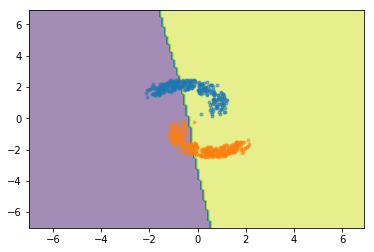

In [15]:
plt.contourf(xx,yy,y_hats,alpha=0.5)

plt.plot(Spiral1[0:-1,0], Spiral1[0:-1,1], ".", label="Spiral 1", alpha=0.5)
plt.plot(Spiral2[0:-1,0], Spiral2[0:-1,1], ".", label="Spiral 2", alpha=0.5)